<a name = "inicio"></a>

<div style="font-size: 50px;text-align: center;height:60px;padding:10px;margin:10px 0 0 0;">SUPPORT VECTOR MACHINES</div>

1. [Introducción](#Introducción)
1. [Maximum Margin Classifiers](#Maximum-Margin-Classifiers)
    1. [Atributos de SVC](#Atributos-de-SVC)
    1. [Predicciones con SVC](#Predicciones-con-SVC)
    1. [La función de decisión](#La-función-de-decisión)
1. [Soft Margin Classifiers](#Soft-Margin-Classifiers)
    1. [El parámetro de regularización](#El-parámetro-de-regularización)
    1. [Support Vector Classifiers](#Support-Vector-Classifiers)
1. [Support Vector Machines](#Support-Vector-Machines)
1. [Un poco de matemáticas](#Un-poco-de-matemáticas)
    1. [Producto escalar de dos vectores](#Producto-escalar-de-dos-vectores)
1. [Kernels](#Kernels)
1. [El Kernel Trick](#El-Kernel-Trick)
1. [Kernels comunes](#Kernels-comunes)
1. [Kernels personalizados](#Kernels-personalizados)
1. [Implementaciones de Scikit-Learn](#Implementaciones-de-Scikit-Learn)
1. [Escenarios de regresión](#Escenarios-de-regresión)
1. [Ventajas y desventajas](#Ventajas-y-desventajas)

# Introducción
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

**Support Vector Machines (SVM)** son un conjunto de métodos de aprendizaje supervisado usados en clasificación, regresión y detección de anomalías. Fueron desarrollados por Vladimir Vapnik y su equipo en los años 60, aunque no fue hasta los años 90 que comenzaron a utilizarse.

Supongamos que queremos clasificar muestras en un espacio de dos dimensiones:

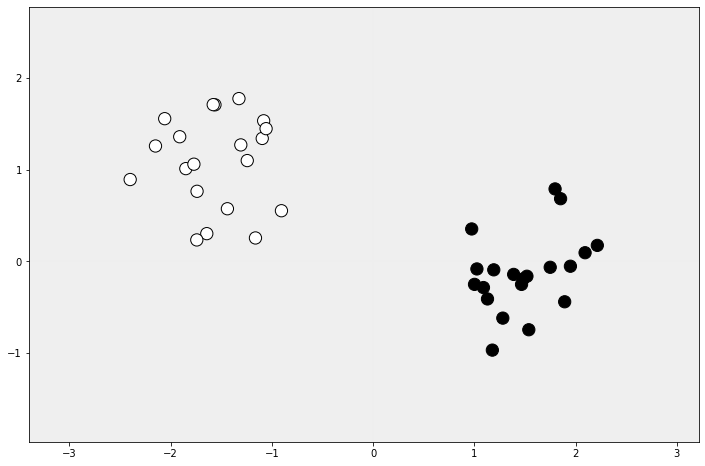

Muchos clasificadores lineales podrían realizar esta tarea, por ejemplo, aquel que fije el siguiente *límite de decisión* (*decision boundary* en inglés):

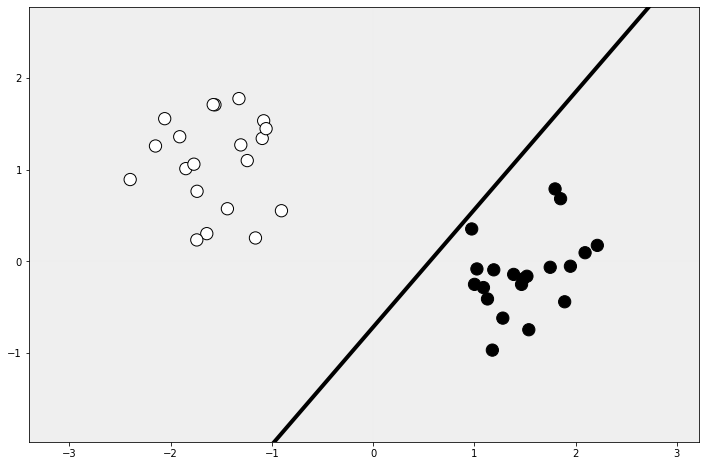

Sin embargo, estaremos de acuerdo en que no parece demasiado seguro. La aparición de un nuevo punto cerca del cluster de puntos negros pero al otro lado del límite de decisión...

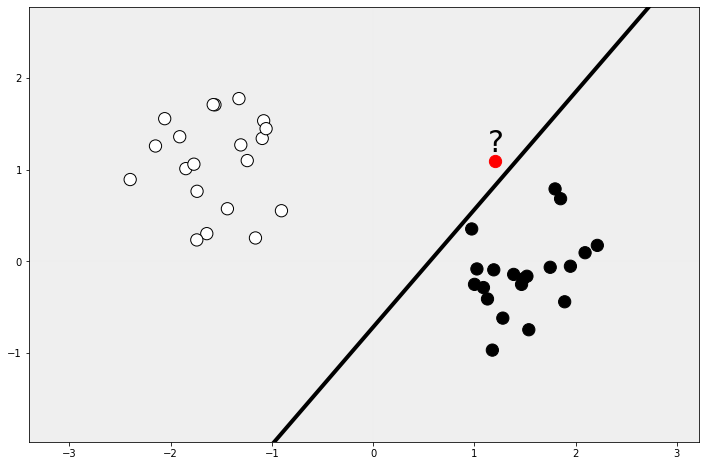

...llevaría al clasificador a considerarlo blanco, lo que no parece muy lógico.

# Maximum Margin Classifiers
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Para solucionar este tipo de problemas surgen los clasificadores de máximo margen. Un **Clasificador de Máximo Margen** (**Maximum Margin Classifier**) es aquel clasificador capaz de separar dos grupos de valores (supongámoslos linealmente separables) mediante un *hiperplano* que diste la máxima distancia posible al punto más próximo de ambos grupos de valores.

En el ejemplo anterior sería el hiperplano mostrado en la siguiente imagen:

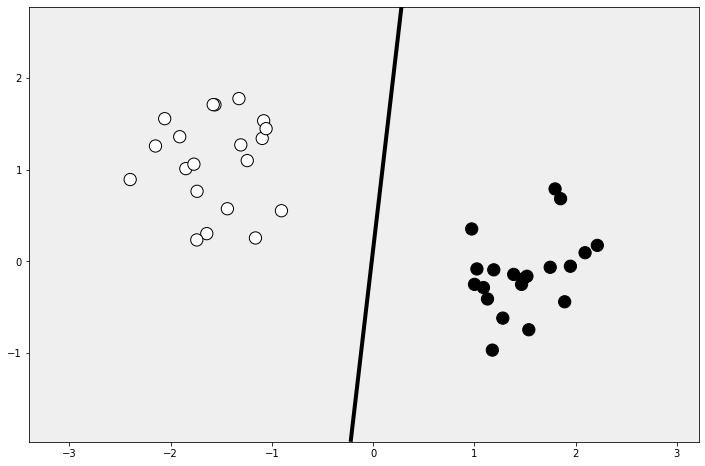

Este clasificador parece mucho más estable, al existir un cierto margen alrededor del límite de decisión que permitiría clasificar correctamente nuevas muestras aun cuando éstas se encontrasen a cierta distancia de su grupo natural. Por ejemplo, la nueva muestra que habíamos visto...

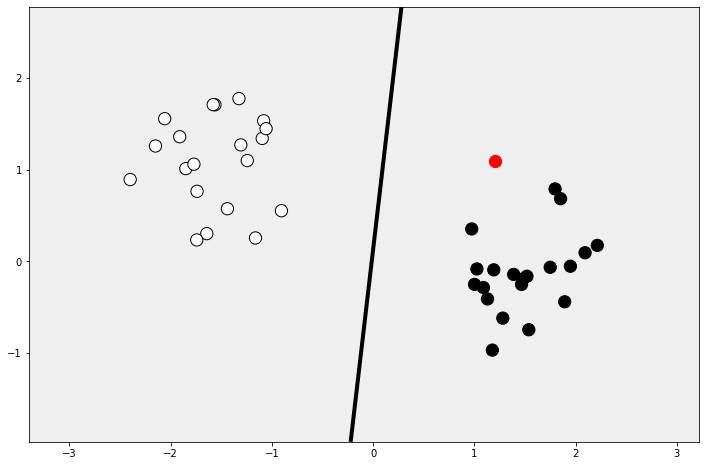

...se clasificaría ahora como una muestra "negra".

El objetivo de este tipo de clasificadores es, por lo tanto, maximizar la distancia que lo separa de las dos clases. Una vez obtenido el límite de decisión, denominamos **margen** a la suma de las dos distancias que separan al hiperplano del punto más próximo de cada clase (línea roja en la siguiente imagen):

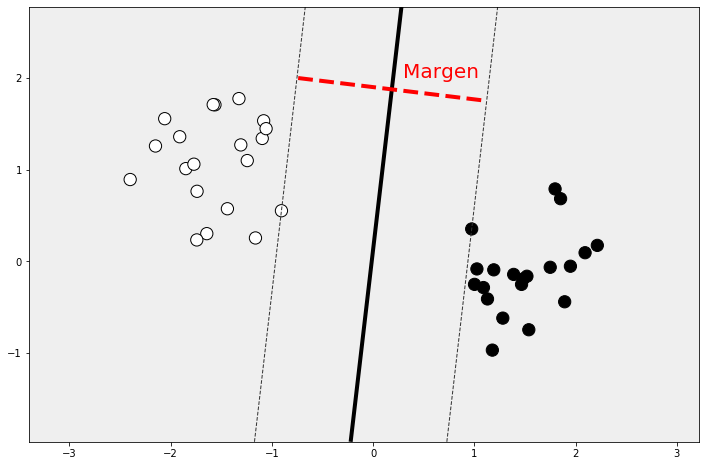

El hiperplano calculado es denominado **hiperplano de máximo margen**.

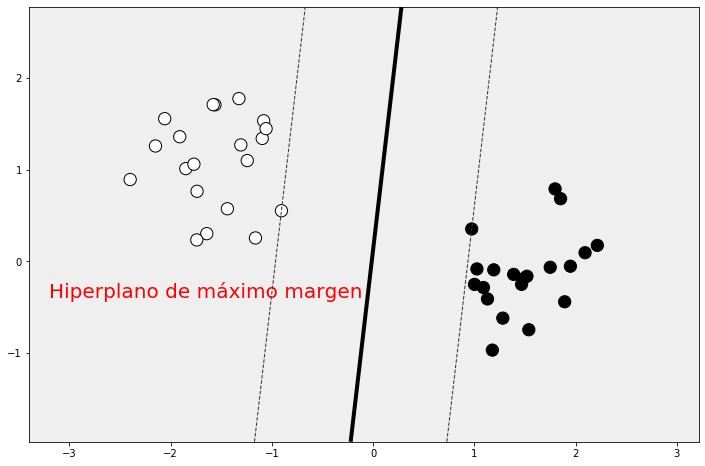

Es evidente que este margen va a depender de los puntos de cada clase más próximos a la línea de decisión, puntos que se conocen como **Support Vectors** o **Vectores de Soporte**, mostrados con un borde en la siguiente imagen:

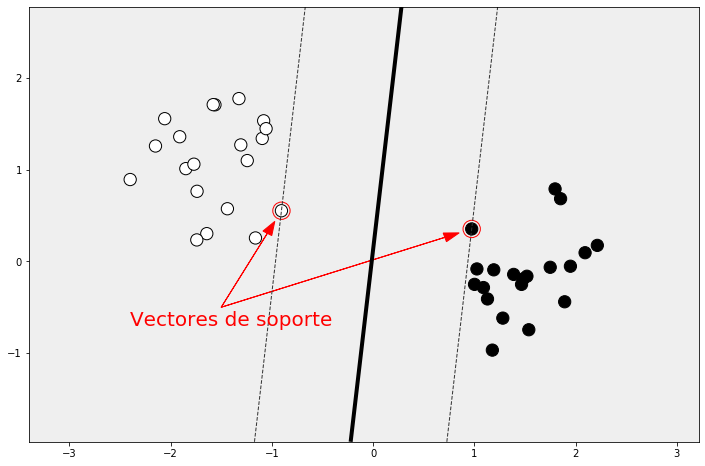

Vamos a entrenar un clasificador de máximo margen usando la clase SVC (*Support Vector Classifier*) proveída por Scikit-Learn usando un kernel lineal (veremos en breve qué es esto). Comenzamos leyendo los datos:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = np.load("XClas.npy")
y = np.load("yClas.npy")

Podemos visualizarlos usando la función draw (véase el código en el fichero draw.py):

In [3]:
from draw import draw
# Librería expecial para mostrar datos de forma sencilla

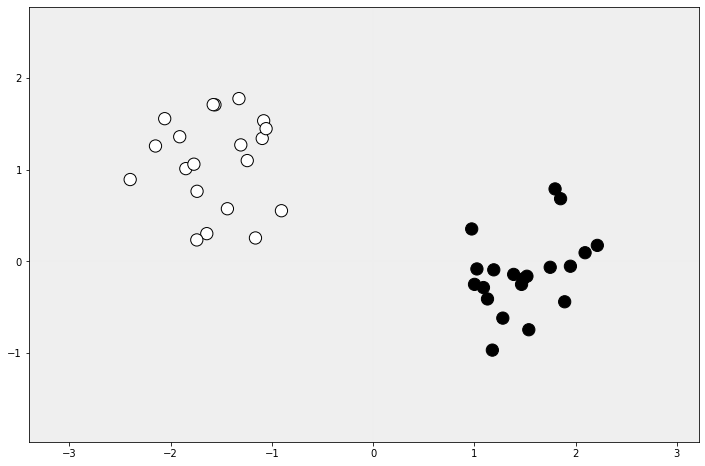

In [4]:
draw(X, y);

Importamos la clase SVC:

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [5]:
from sklearn.svm import SVC

Instanciamos y entrenamos el modelo:

In [8]:
model = SVC(kernel = "linear")
model.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Atributos de SVC
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Algunos atributos interesantes de esta clase:

###### .classes_

El atributo **.classes_** nos devuelve las etiquetas de las clases identificadas:

In [7]:
model.classes_

array([0, 1])

###### .support_

Este atributo nos devuelve los índices en nuestro conjunto de entrenamiento de los vectores de soporte:

In [8]:
model.support_

array([ 0, 13])

Podemos, por lo tanto, visualizar los puntos en cuestión indexando nuestro array X:

In [9]:
X[model.support_]

array([[ 0.9744541 ,  0.35384895],
       [-0.90498275,  0.55267973]])

###### .support_vectors_

Además de los índices, podemos acceder directamente a los vectores de soporte con el atributo *.support_vectors_*:

In [10]:
model.support_vectors_

array([[ 0.9744541 ,  0.35384895],
       [-0.90498275,  0.55267973]])

###### .n_support_

El atributo *.n_support* devuelve el número de vectores de soporte de cada clase:

In [11]:
model.n_support_

array([1, 1])

Los vectores de soporte a los que tenemos acceso usando los atributos .support o .support_vectors están en orden, de forma que podemos extraer los vectores de soporte de cada clase:

In [12]:
# clase 0
model.support_vectors_[:1]

array([[0.9744541 , 0.35384895]])

In [9]:
# clase 1
model.support_vectors_[1:]

array([[-0.90498275,  0.55267973]])

### Predicciones con SVC
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Ahora podríamos realizar predicciones usando el método .predict(). Recordemos la distribución de nuestros puntos en el plano:

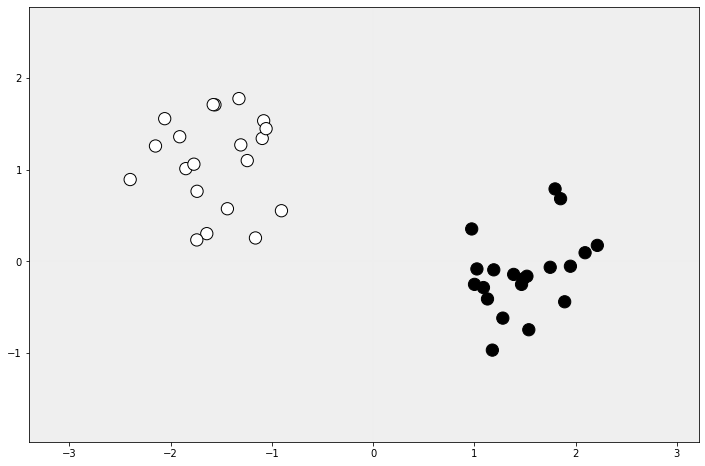

In [14]:
draw(X, y);

El punto [2, 0], por ejemplo, recibiría la clase 0 correspondiente a los puntos negros:

In [10]:
# Para hacer una predicción: es importante que las formas de la muestra a predecir sean iguales que las de entrenamiento
sample = np.array([2, 0]).reshape(1, -1)
#Y así configuramos los datos y redimensinamos para que valga como muestra
model.predict(sample)
#Dice que para la muestra, da resultado es 0, los puntos negros.

array([0], dtype=int32)

De forma semejante, el punto [-2, 1] recibiría la clase 1 correspondiente a los puntos blancos:

In [12]:
sample = np.array([-2, 1]).reshape(1, -1)
model.predict(sample)

array([1], dtype=int32)

Podríamos mostrar, por ejemplo, la predicción para los vectores de soporte (es decir, las clases a las que se los ha asignado):

In [13]:
model.support_vectors_

array([[ 0.9744541 ,  0.35384895],
       [-0.90498275,  0.55267973]])

In [14]:
model.predict(model.support_vectors_)

array([0, 1], dtype=int32)

Es decir, el punto [0.9744541, 0.35384895] (vector de soporte de la clase negra) recibe como predicción la clase 0 (la negra), y el punto [-0.90498275, 0.55267973] la clase 1 (la blanca).

Una vez más, el punto [1.2, 1.1] que habíamos incluido en los ejemplos previos recibiría como predicción la correspondiente a la clase blanca:

In [15]:
sample = np.array([1.2, 1.1]).reshape(1, -1)
model.predict(sample)

array([0], dtype=int32)

### La función de decisión
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

El método .decision_function() nos devuelve la *función de decisión* correspondiente a cada punto. Es decir, devuelve el valor asignado a cada punto a partir del cual se determinará la clase a la que asignarlo.

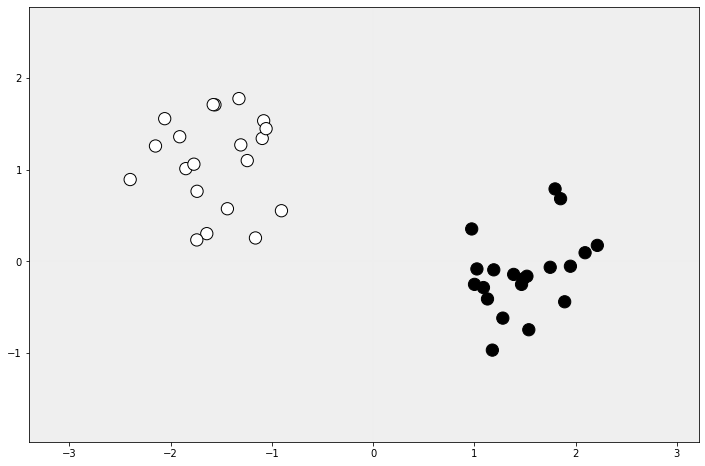

In [16]:
draw(X, y);

Por ejemplo, la función de decisión para el punto [-3, -1] es:

In [17]:
sample = np.array([3, -1]).reshape(1, -1)
model.decision_function(sample)

array([-3.28235261])

...valor negativo que tiene como consecuencia que se asigne a dicho punto la clase 0

In [22]:
import matplotlib.pyplot as plt

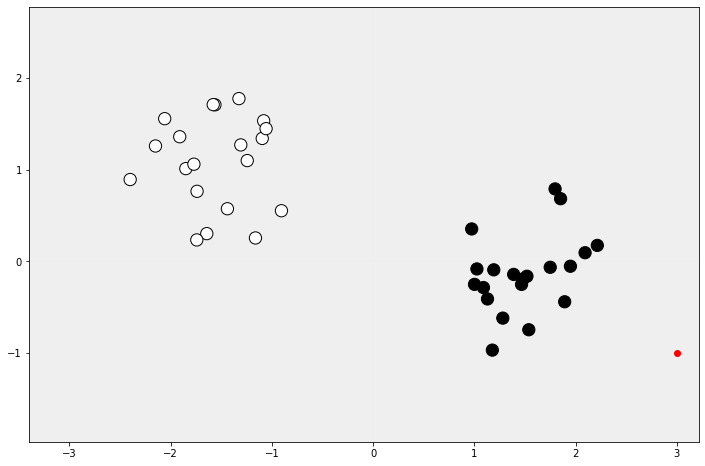

In [23]:
fig, ax = draw(X, y, show = False)
ax.scatter([3], [-1], c = "Red")
plt.show()

Calculemos la función de decisión para otros puntos:

In [18]:
sample = np.array([1, 0]).reshape(1, -1)
model.decision_function(sample)

array([-1.06627886])

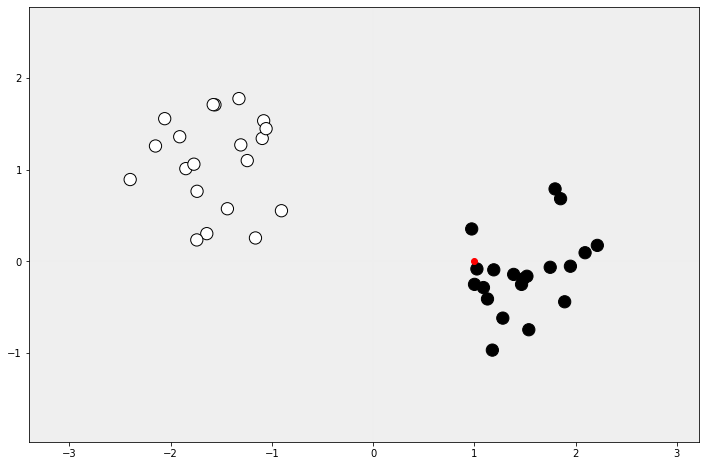

In [19]:
fig, ax = draw(X, y, show = False)
ax.scatter([1], [0], c = "Red")
plt.show()

Valor también negativo (nuevamente clase 0)

In [20]:
sample = np.array([-2, 1]).reshape(1, -1)
model.decision_function(sample)

array([2.20216519])

...en este caso un valor positivo que supone la asignación de la clase 1

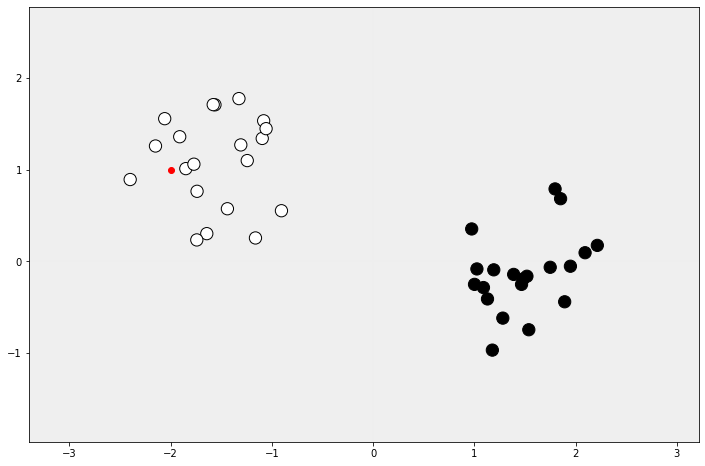

In [21]:
fig, ax = draw(X, y, show = False)
ax.scatter([-2], [1], c = "Red")
plt.show()

Calculemos, por ejemplo, el valor de la función de decisión asociado a una matriz de puntos del plano:

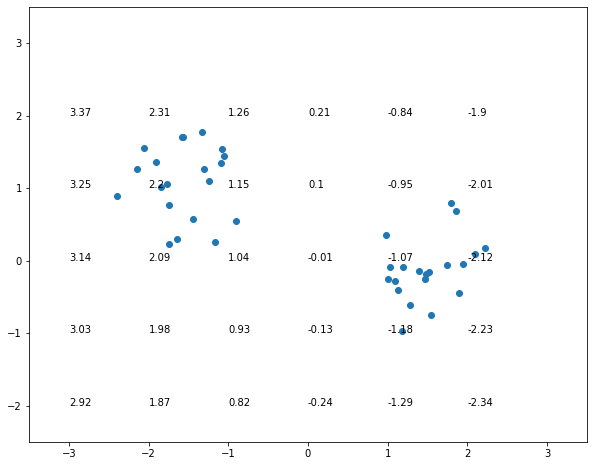

In [22]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
for cx in range(-3, 3):
    for cy in range(-2, 3):
        sample = np.array([cx, cy]).reshape(1, -1)
        value = model.decision_function(sample)[0]
        plt.text(cx, cy, round(value, 2), fontsize = 10)
plt.ylim(-2.5, 3.5)
plt.xlim(-3.5, 3.5)
plt.show()

Comprobamos que los valores negativos reciben como predicción la clase 0, mientras que los positivos reciben como predicción la clase 1.

También podemos dibujar los puntos de un color diferente en función de la predicción que se realice para cada uno:

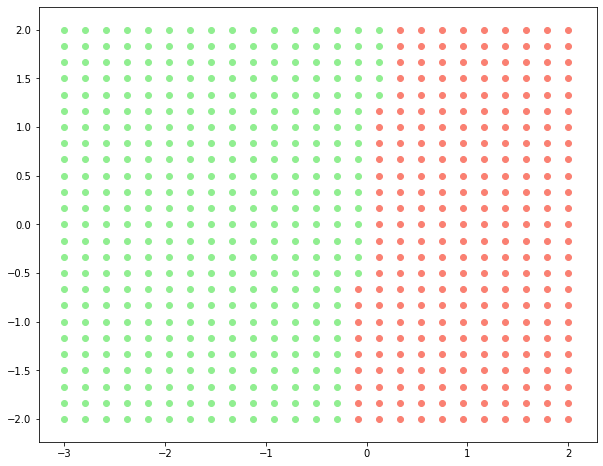

In [29]:
colors = ["salmon", "lightgreen"]
plt.figure(figsize = (10, 8))
for cx in np.linspace(-3, 2, 25):
    for cy in np.linspace(-2, 2, 25):
        sample = np.array([cx, cy]).reshape(1, -1)
        value = model.predict(sample)[0]
        plt.scatter(cx, cy, c = colors[value])
plt.show()

Pero podemos dibujar el resultado de la función de decisión "para todos los puntos del plano" con la función plt.pcolormesh() (en realidad no es para todos los puntos, pero la función rellena los huecos):

https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.pcolormesh.html

https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html

Creamos las matrices para las coordenadas X e Y:

In [30]:
xx = np.linspace(-3, 3, 200)
yy = np.linspace(-2, 3, 200)
XX, YY = np.meshgrid(xx, yy)

Y la matriz de la coordenada Z a partir de la función de decisión:

In [31]:
ZZ = model.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

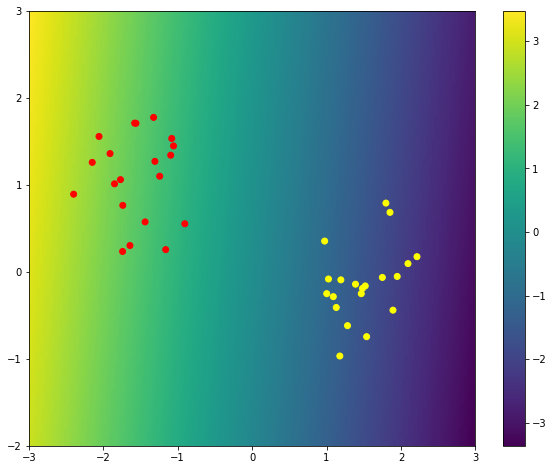

In [32]:
fig, ax = plt.subplots(figsize = (10, 8))
sc = ax.pcolormesh(XX, YY, ZZ)
ax.scatter(X[:, 0], X[:, 1], c = y, cmap = "autumn_r")
fig.colorbar(sc)
plt.show()

Con la función plt.contour() podemos mostrar los bordes de los niveles que se indiquen:

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.contour.html

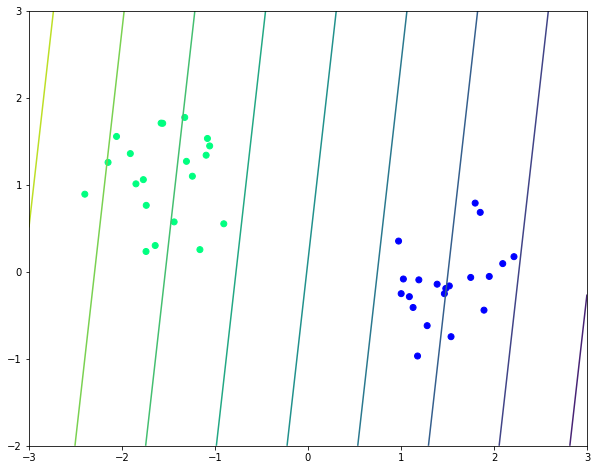

In [33]:
fig, ax = plt.subplots(figsize = (10, 8))
#sc = ax.pcolormesh(XX, YY, ZZ)
ax.scatter(X[:, 0], X[:, 1], c = y, cmap = "winter")
ax.contour(XX, YY, ZZ, levels = 10)
plt.show()

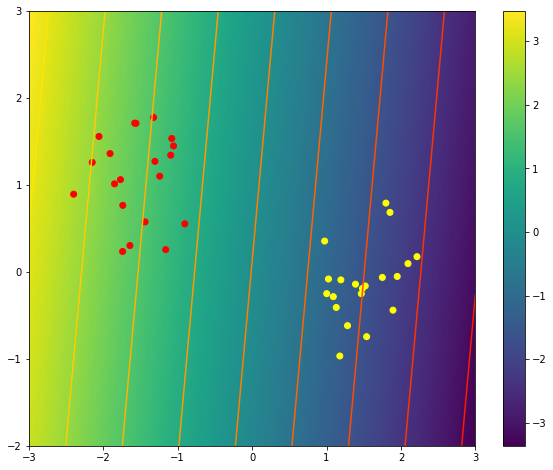

In [34]:
fig, ax = plt.subplots(figsize = (10, 8))
sc = ax.pcolormesh(XX, YY, ZZ)
ax.scatter(X[:, 0], X[:, 1], c = y, cmap = "autumn_r")
ax.contour(XX, YY, ZZ, levels = 10, cmap = "autumn")
fig.colorbar(sc)
plt.show()

Y con plt.contourf() repetimos la misma acción pero rellenando las bandas con el color correspondiente:

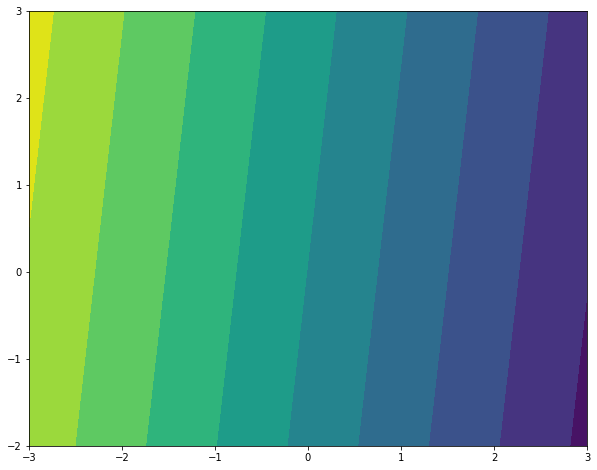

In [35]:
fig, ax = plt.subplots(figsize = (10, 8))
#sc = ax.pcolormesh(XX, YY, ZZ)
ax.scatter(X[:, 0], X[:, 1], c = y, cmap = "autumn_r")
ax.contourf(XX, YY, ZZ, levels = 10)
plt.show()

Si solo queremos ver las clases, llevamos a ZZ la predicción, y no el resultado de la función de decisión:

In [36]:
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

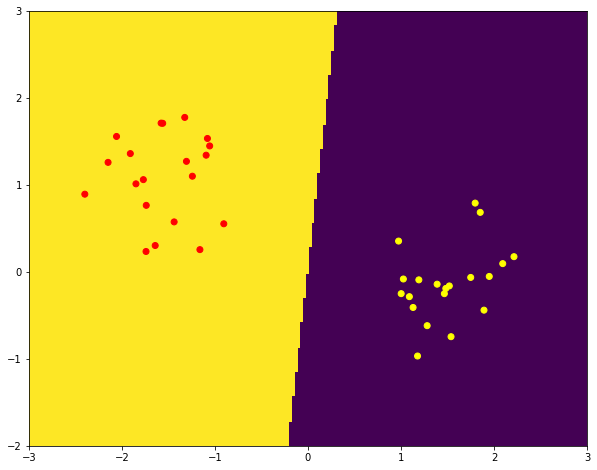

In [37]:
fig, ax = plt.subplots(figsize = (10, 8))
sc = ax.pcolormesh(XX, YY, ZZ)
ax.scatter(X[:, 0], X[:, 1], c = y, cmap = "autumn_r")
plt.show()

Este trabajo (y otras tareas) es lo que he programado en la función draw(), para evitarnos tener que repetir el mismo código una y otra vez:

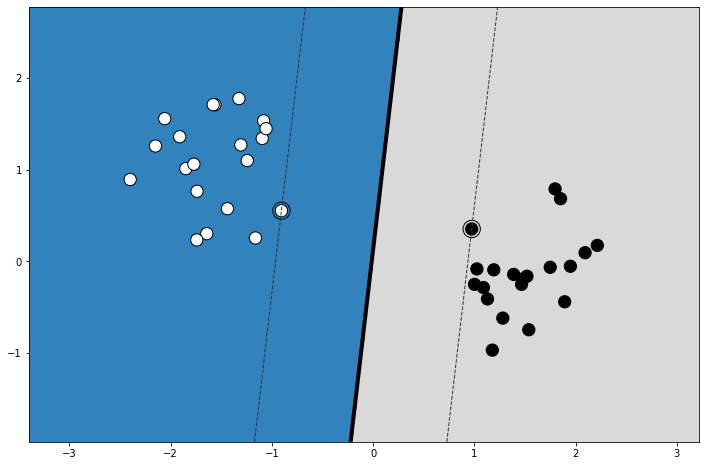

In [38]:
draw(X, y, model);

La zona con los puntos para los que la función de decisión devuelve un valor negativo (es decir, los puntos que reciben como predicción la clase 0) se muestra con fondo gris, y la zona con los puntos para los que la función de decisión devuelve un valor positivo (puntos a asignar a la clase 1) se muestra con fondo azul.

El hiperplano de máximo margen es el correspondiente a la línea negra que divide las dos áreas coloreadas. Vemos que también se muestran en la imagen los vectores de soporte y las rectas que devuelven el mismo valor para la función de decisión.

# Soft Margin Classifiers
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Pero ¿qué ocurriría si los valores estuviesen repartidos de la siguiente forma?

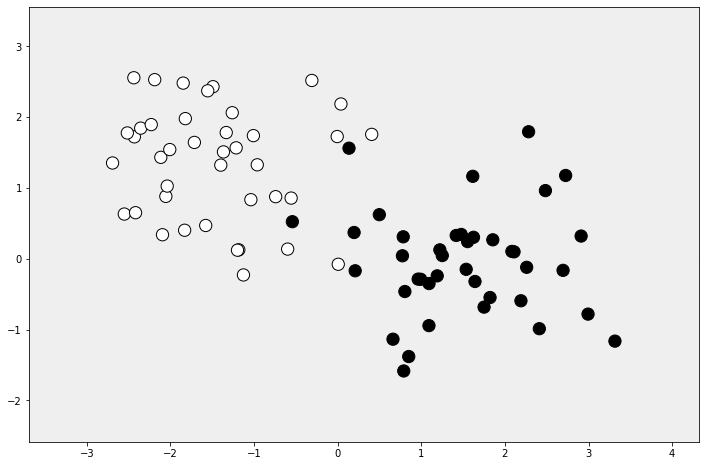

En estas circunstancias no existe ningún clasificador capaz de separar linealmente ambas clases sin cometer errores.

Con este objetivo se definen los **clasificadores de margen blando** (o **Soft Margin Classifiers**), clasificadores que permiten clasificar erróneamente algunos valores con el objetivo de seguir manteniendo margenes suficientemente grandes, por ejemplo: 

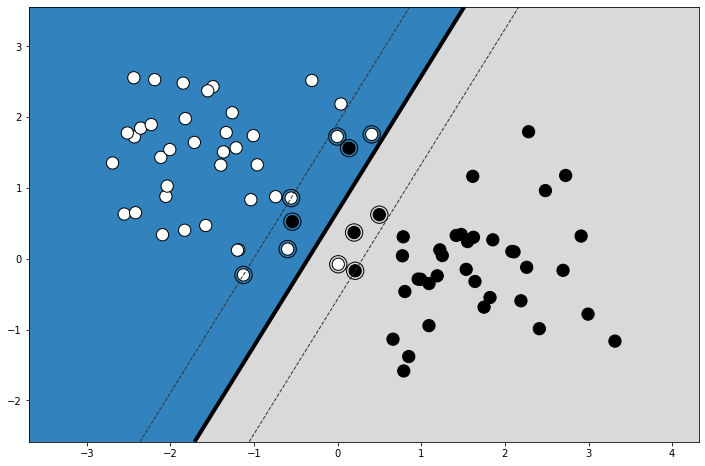

Una vez definido el hiperplano que separa los valores de las diferentes categorías, la distancia mínima del hiperplano a los valores correctamente clasificados de las clases se denomina **Soft Margin** o **Margen Blando**.

Ahora, los vectores de soporte van a ser aquellos que se encuentren en el límite del margen y todos aquellos dentro del margen. En la imagen anterior, por ejemplo, vemos que dos de los vectores de soporte pertenecen a la clase de puntos negros, señal de que, o bien caen exactamente sobre el borde, o uno de ellos está dentro del margen.

### El parámetro de regularización
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

En los *Soft Margin Classifiers* algunas muestras aparecen dentro del margen o en el lado erróneo del margen -tal y como vemos en la imagen anterior-, muestras a las que se asocia una "penalización" que depende de lo lejos que se encuentren del área correcta en la que deberían estar incluidos.

El objetivo de estos modelos es obtener el mayor margen posible con la mínima penalización.

En estos clasificadores, se introduce un "*parámetro de regularización*" C que controla el equilibrio entre el doble objetivo de maximizar el margen y minimizar el error cometido. C multiplica a los errores cometidos, de forma que un valor bajo de C tiende a penalizar poco los errores permitiendo márgenes mayores a costa de cometer más errores (alta regularización), mientras que un valor alto de C penaliza mucho los errores llevando al modelo a cometer menos errores a costa de un margen menor (baja regularización).

Sin hacer mucho caso a las matemáticas (más adelante las tocaremos un poquito más), en un clasificador de máximo margen la función objetivo a optimizar es la siguiente:

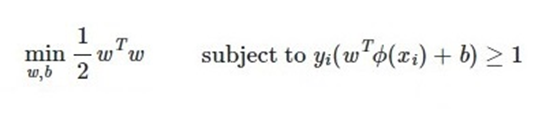

(es decir, tenemos que maximizar el margen -lo que se consigue minimizando cierto vector w-, asegurándonos de que los puntos de nuestro dataset están en el lado correcto).

Pues bien, en los clasificadores de máximo margen la función objetivo es la siguiente:

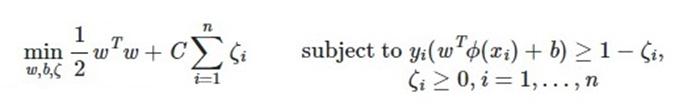

Es decir, ahora hay que maximizar el margen pero añadiendo como "penalización" los errores cometidos multiplicados por el parámetro de regularización C.

import seaborn as sns

iris = sns.load_dataset("iris")
iris = iris[iris.species.isin(["setosa", "virginica"])]
iris = iris.loc[:, ["sepal_length", "sepal_width", "species"]]
iris = iris.sample(frac = 1)
y_iris = iris.pop("species").astype("category").cat.codes.values
X_iris = iris.values

Para ver un ejemplo, vamos a partir de las características "sepal_length", "sepal_width" del dataset Iris:

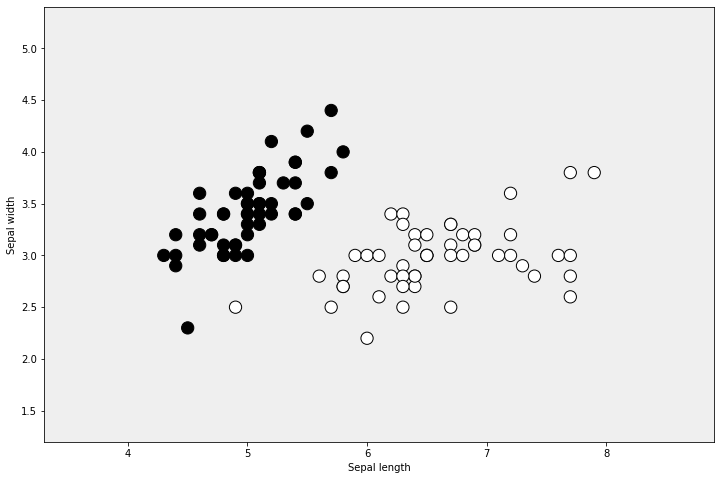

...la siguiente imagen se correspondería con un clasificador de margen blando con un valor de C pequeño, permitiéndose errores a costa de un mayor margen:

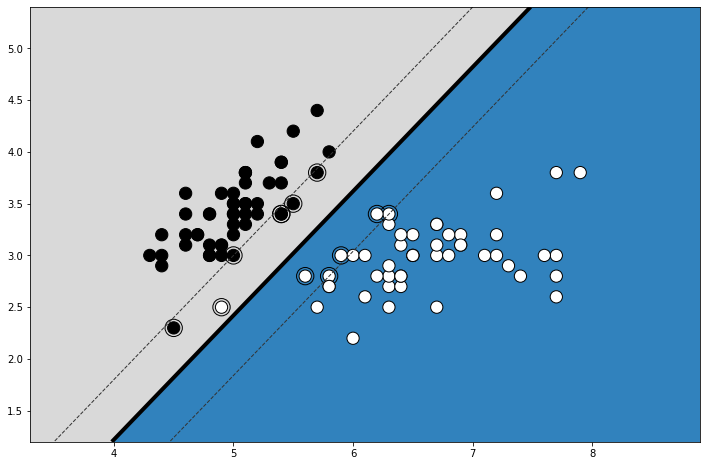

...mientras que la siguiente imagen se correspondería con un clasificador con un valor de C alto, en el que los errores se penalizan mucho:

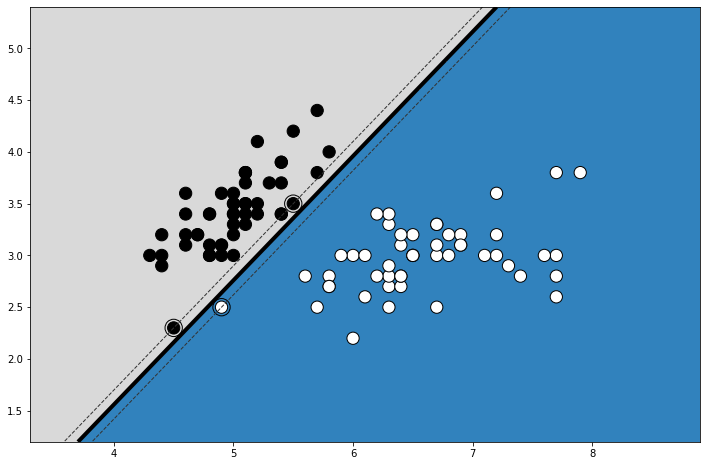

Implementemos estos clasificadores a los valores X e y que habíamos visto:

In [39]:
X = np.load("XSMClas.npy")
y = np.load("ySMClas.npy")

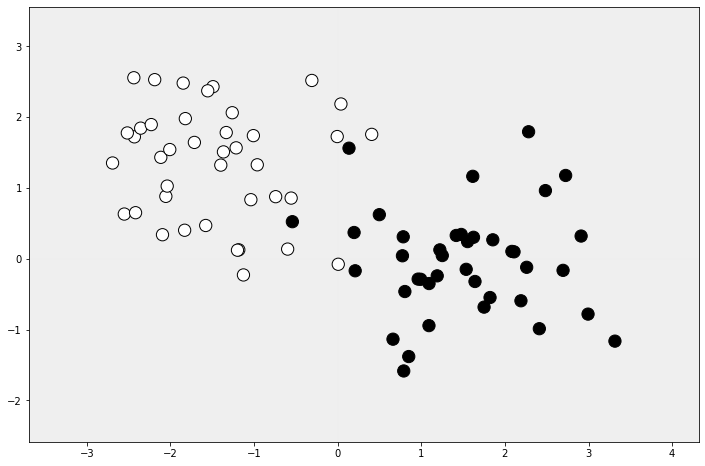

In [40]:
draw(X, y);

Instanciamos el algoritmo y fijamos el valor de C que nos interese (comencemos por el ejemplo de alta regularización en el que se permiten errores con el objetivo de incrementar el margen):

In [41]:
model = SVC(kernel = "linear", C = 1)

Lo entrenamos:

In [42]:
model.fit(X, y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Nuevamente, si mostrásemos cada punto del plano con un color distinto en función de la predicción que el modelo le asigne, tendríamos el siguiente mapa:

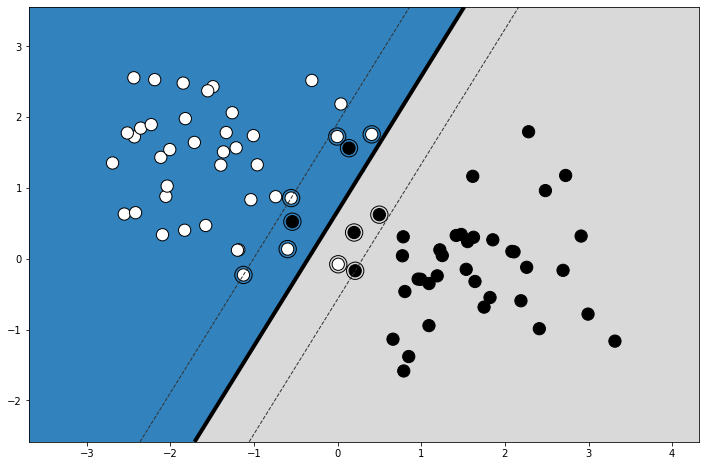

In [43]:
draw(X, y, model);

Ahora podríamos realizar predicciones:

In [44]:
model.predict([[4, 0]])

array([0])

...devuelve la clase 0 (la correspondiente a los puntos mostrados en negro)

In [45]:
model.predict([[-2, -2]])

array([1])

...devuelve la clase 1 (la correspondiente a los puntos mostrados en blanco)

En este caso se han encontrado los siguientes vectores de soporte:

In [46]:
model.n_support_

array([5, 6])

...5 para la clase 0 y 6 para la clase 1

In [47]:
model.support_vectors_

array([[-0.54239185,  0.52289488],
       [ 0.19584132,  0.3702258 ],
       [ 0.49776371,  0.62199228],
       [ 0.20888172, -0.17019222],
       [ 0.13498385,  1.56062032],
       [-1.12747005, -0.22899495],
       [ 0.00652056, -0.07820725],
       [-0.59869126,  0.13605479],
       [-0.00595283,  1.72483573],
       [-0.55697634,  0.85606013],
       [ 0.40651582,  1.75558359]])

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Repite el mismo proceso entrenando un modelo con baja regularización.</div>
</div>

Instanciamos el algoritmo y lo entrenamos:

In [48]:
model = SVC(kernel = "linear", C = 1000)
model.fit(X, y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Ahora mostramos el mapa de las predicciones:

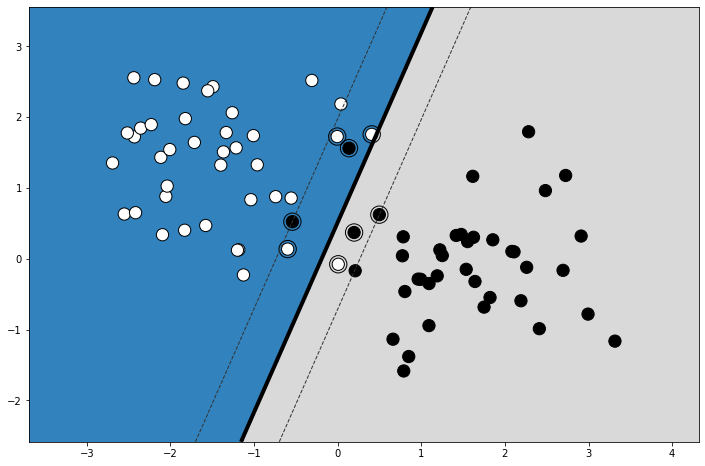

In [49]:
draw(X, y, model);

En este caso, los vectores de soporte encontrados son los siguientes:

In [50]:
model.n_support_

array([4, 4])

...4 vectores de soporte para la clase 0 y otros 4 para la clase 1

In [51]:
model.support_vectors_

array([[-0.54239185,  0.52289488],
       [ 0.19584132,  0.3702258 ],
       [ 0.49776371,  0.62199228],
       [ 0.13498385,  1.56062032],
       [ 0.00652056, -0.07820725],
       [-0.59869126,  0.13605479],
       [-0.00595283,  1.72483573],
       [ 0.40651582,  1.75558359]])

Los clasificadores de margen blando son también denominados **Clasificadores de Vectores de Soporte** o **Support Vector Classifiers**, pues los valores que delimitan el margen y los que quedan dentro de él son denominados, como ya se ha comentado, **Vectores de Soporte** o **Support Vectors**.

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>A partir de los campos "sepal_length", "sepal_width" de iris correspondientes a las especies "setosa" y "virginica", y con un coeficiente de regularización de 10, extrae los vectores de soporte, muéstralos en pantalla y en una gráfica.</div>
<div>Puedes leer el dataset iris del fichero "iris.csv".</div>
</div>

import seaborn as sns
iris = sns.load_dataset("iris")
iris.rename({"species": "species_name"}, axis = 1, inplace = True)
iris["species"] = iris["species_name"].astype("category").cat.codes.values
iris.to_csv("iris.csv", index = False)

In [52]:
import pandas as pd

In [53]:
iris = pd.read_csv("iris.csv")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species_name  species
0           5.1          3.5           1.4          0.2       setosa        0
1           4.9          3.0           1.4          0.2       setosa        0
2           4.7          3.2           1.3          0.2       setosa        0
3           4.6          3.1           1.5          0.2       setosa        0
4           5.0          3.6           1.4          0.2       setosa        0

In [54]:
iris = iris.loc[iris.species_name.isin(["setosa", "virginica"])]
iris = iris.reindex(["sepal_length", "sepal_width", "species"], axis = 1)
iris = iris.sample(frac = 1)
y_iris = iris.pop("species").astype("category").cat.codes.values
X_iris = iris.values

Instanciamos el modelo y lo entrenamos:

In [55]:
model = SVC(kernel = "linear", C = 10)
model.fit(X_iris, y_iris)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Mostramos los vectores de soporte:

In [56]:
model.support_vectors_

array([[5.5, 3.5],
       [4.5, 2.3],
       [5.6, 2.8],
       [4.9, 2.5]])

Y los mostramos en la gráfica:

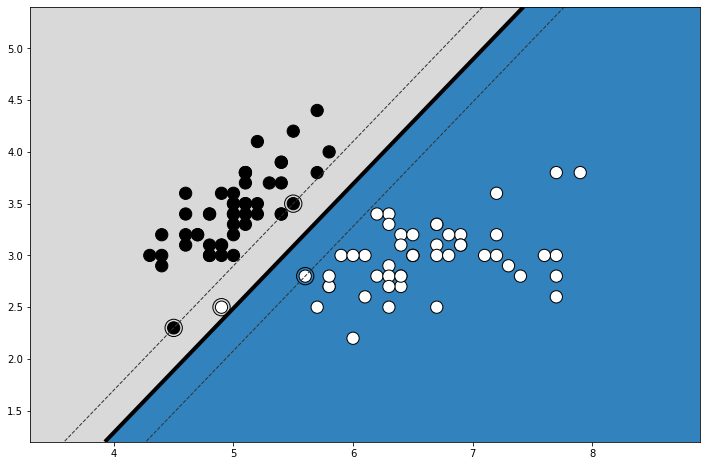

In [57]:
draw(X_iris, y_iris, model);

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Repite el ejercicio con un coeficiente de regularización de 1. ¿Cuántos vectores de soporte hay ahora?</div>
</div>

In [58]:
model = SVC(kernel = "linear", C = 1)
model.fit(X_iris, y_iris)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
model.support_vectors_

array([[5.5, 3.5],
       [5.7, 3.8],
       [5.4, 3.4],
       [5.4, 3.4],
       [5. , 3. ],
       [4.5, 2.3],
       [5.6, 2.8],
       [5.9, 3. ],
       [5.8, 2.8],
       [6.3, 3.4],
       [6.2, 3.4],
       [4.9, 2.5]])

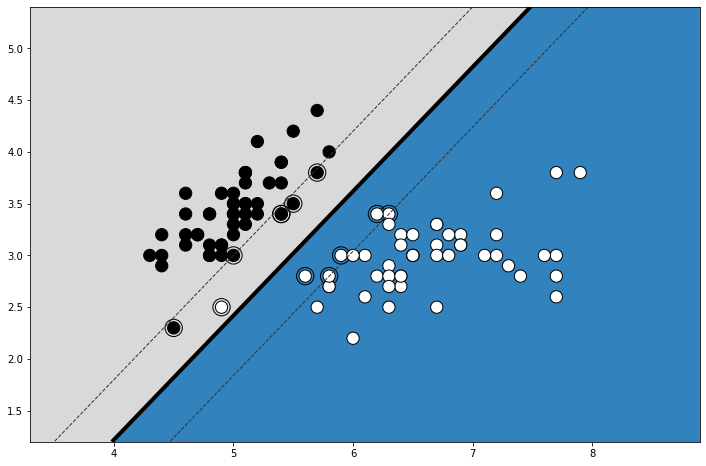

In [60]:
draw(X_iris, y_iris, model);

# Support Vector Machines
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Aun así, hay circunstancias (las más habituales) en las que no es posible escoger un hiperplano sin cometer una cantidad de errores inaceptable:

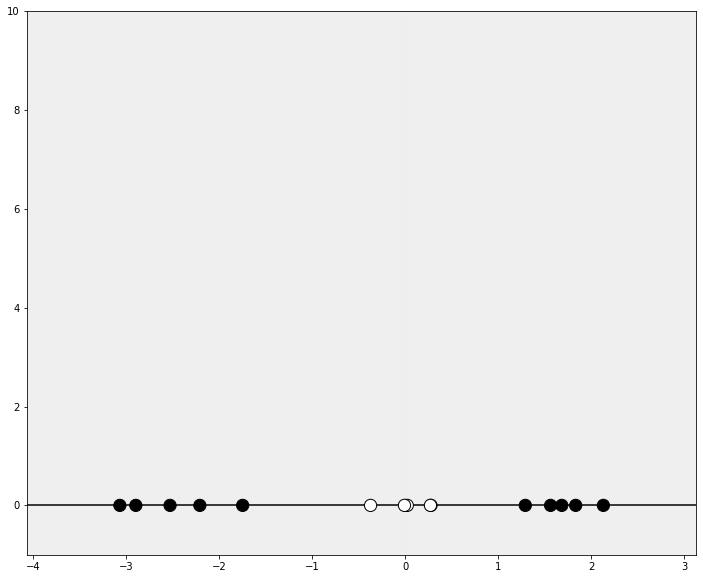

En la imagen anterior (en la que se muestran muestras en un espacio unidimensional), sea cual sea el "threshold" que escojamos (la posición del hiperplano) siempre habrá un excesivamente alto número de muestras que serán mal clasificadas.

Supongamos ahora, sin embargo, que aplicamos a nuestros datos una función que los transforme en datos de un espacio de mayor dimensionalidad. Por ejemplo, en nuestro ejemplo los datos ocupan un espacio unidimensional (se encuentran a lo largo de una recta horizontal). Planteémonos transformarlos a un espacio bidimensional en el que, por ejemplo, la coordenada x sea la coordenada x original, pero la coordenada y sea el cuadrado de la coordenada x... Pasaríamos de tener los datos mostrados en la imagen anterior a tener los siguientes:

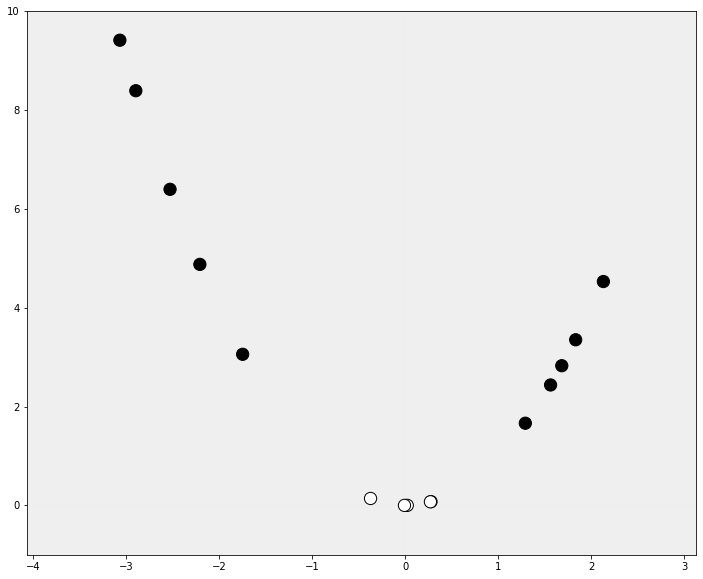

En la imagen anterior vemos que ahora sí es posible crear un hiperplano (en el espacio bidimensional) que separe los puntos:

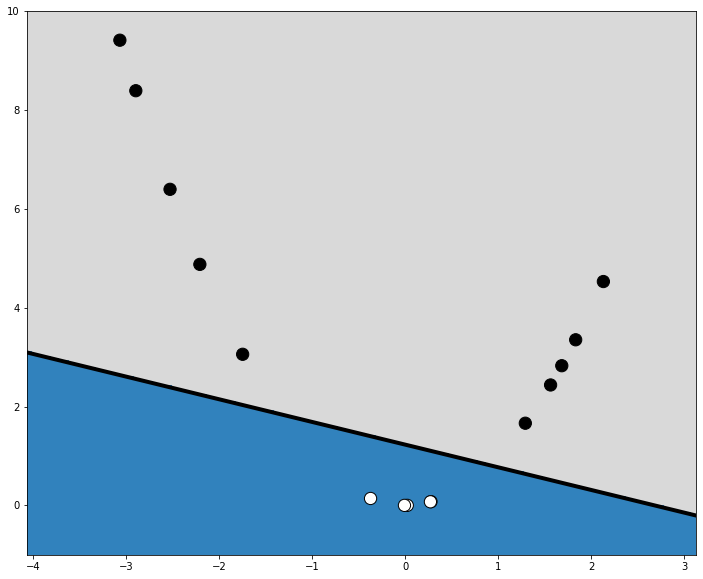

Para hacer una predicción, bastaría coger la muestra en cuestión (determinada por un único valor "x"), transformarla al nuevo espacio (en este ejemplo conservando su "x" y asignando una coordenada "y" que sea igual al cuadrado de "x").

En la siguiente imagen vemos que el punto -2.5 se transformaría de forma tal que quedaría del lado superior del hiperplano:

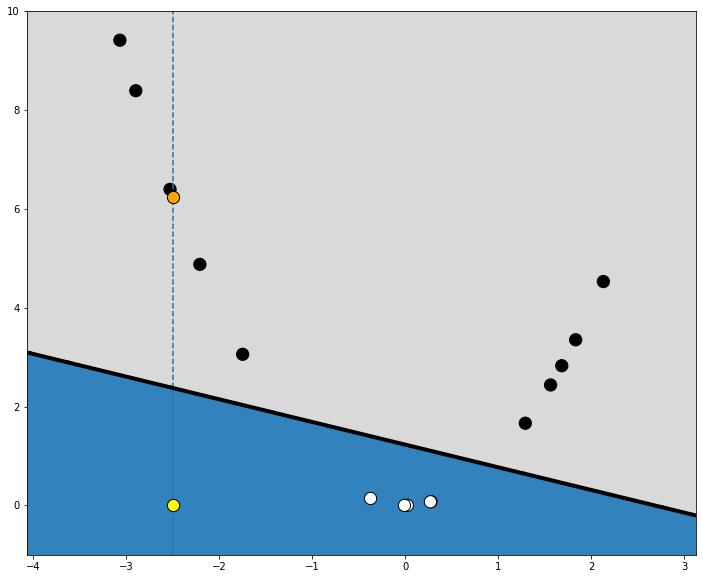

O la muestra con valor 0.6 caería del lado del hiperplano correspondiene a la clase "blanca", como podemos ver en la siguiente imagen:

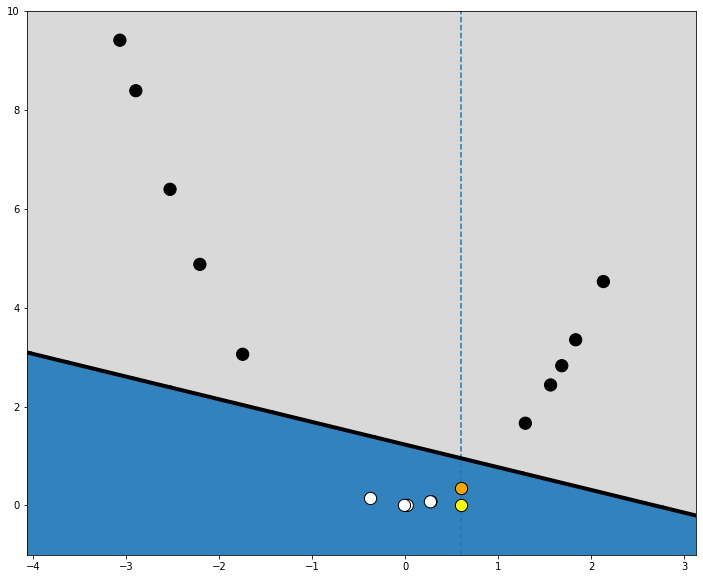

Es decir, el procedimiento aplicado por una *Máquina de Vectores de Soporte* o *Support Vector Machine* es transformar datos desde un espacio de baja dimensionalidad hasta otro de alta dimensionalidad donde sea posible aplicar un clasificador de máximo margen.

# Un poco de matemáticas
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Supongamos que partimos de los siguientes puntos x<sub>i</sub>, cada uno acompañado por un valor y<sub>i</sub> que indica la clase a la que pertenece (1 si la clase es una -que vamos a considerar "clase positiva", y -1 si la clase es la negativa):

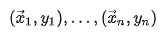

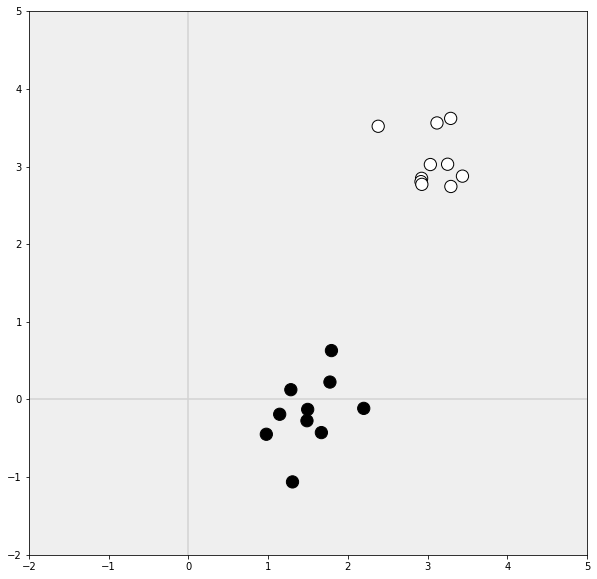

El hiperplano que buscamos es el siguiente:

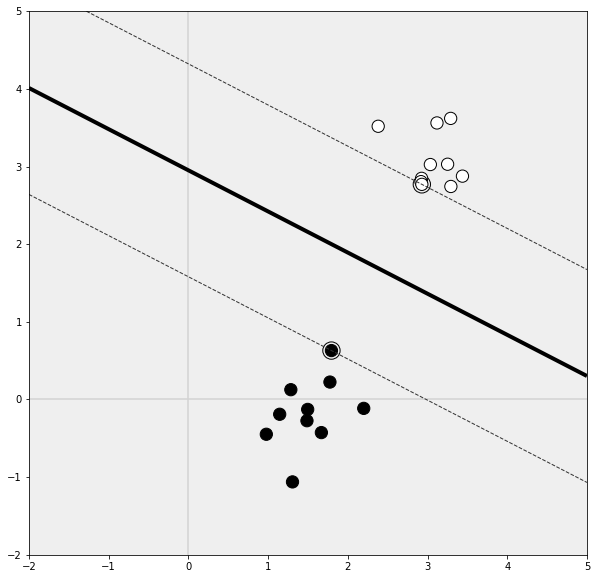

Definimos un vector w, de longitud indefinida (por ahora) que suponemos ortogonal al hiperplano:

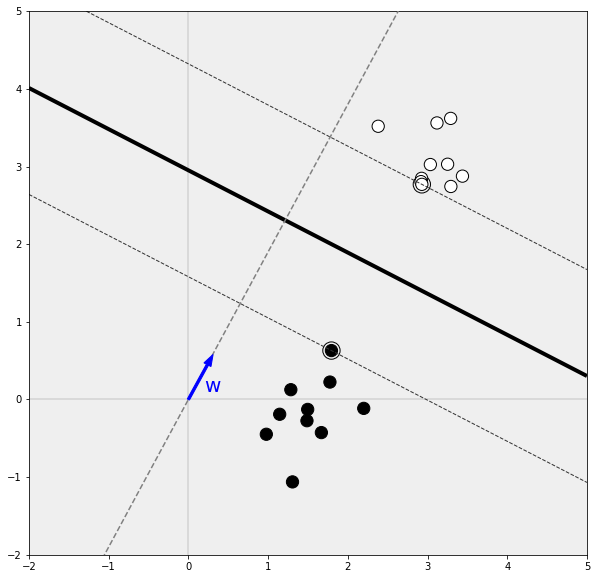

Ahora, dado un punto definido por un vector v (genérico)...

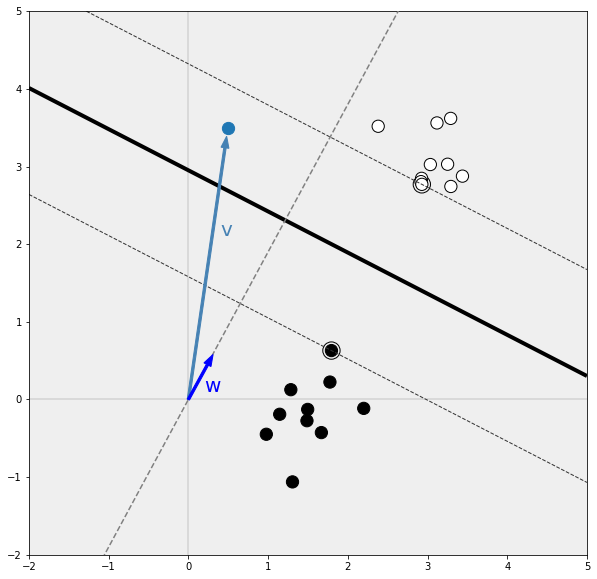

...podemos averiguar si recibe una clase u otra proyectándolo sobre la recta definida por w:

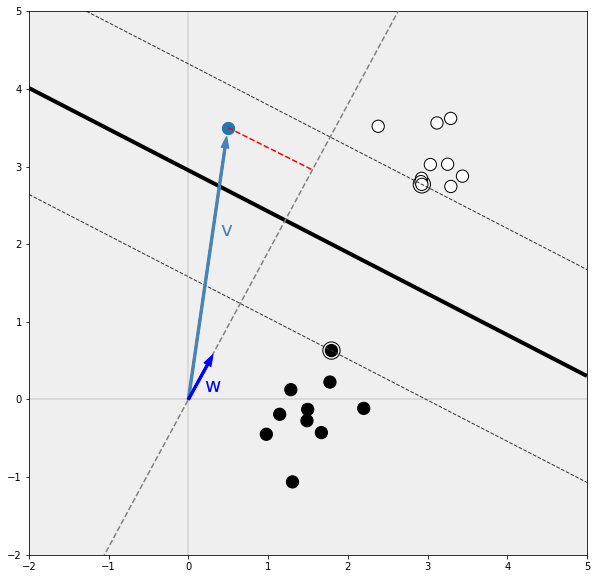

...si cae más allá del punto de cruce entre la recta definida por w y el hiperplano, recibe una clase (que supongamos que se trata de la clase positiva). Y si cae antes del punto de cruce, recibirá la clase que supondremos negativa.

Esta proyección no es más que el producto escalar de w y v.

De este modo, podemos fijar -para el vector w que todavía estamos buscando- una "constricción" para cada punto de nuestro dataset: los de la clase positiva deberán caer más allá del hiperplano, y los de la clase negativa deberán caer más cerca.

El margen de nuestro clasificador vendrá dado por la distancia de nuestro hiperplano a los puntos más próximos de cada clase:

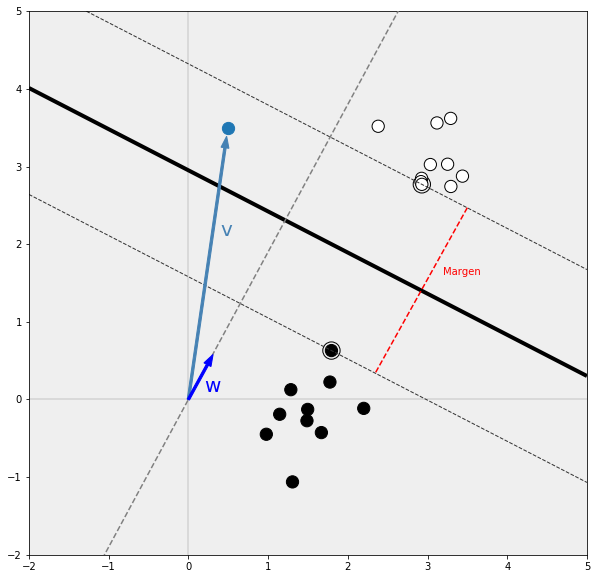

De forma que el objetivo es calcular el mayor valor del margen con las constricciones comentadas: para cada punto de nuestro dataset deberá cumplirse que quede en el lado correcto del hiperplano.

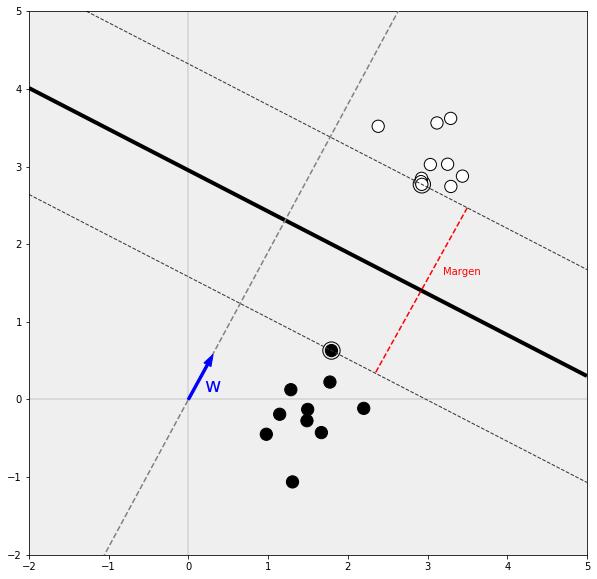

Si hacemos las matemáticas, llegamos a la conclusión de que el margen vendrá dado por la siguiente expresión:

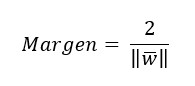

...con las restricciones vistas:

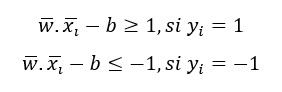

(recordemos que todavía no se ha obtenido ni w ni el parámetro b que se ha añadido)

El objetivo es, por lo tanto, maximizar el margen con dichas limitaciones:

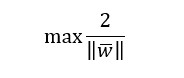

Ahora bien, el máximo de la expresión anterior coincide con el mínimo de la siguiente:

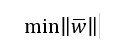

Y, por tanto, con el mínimo de la siguiente:

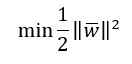

...ya sabemos, con las constricciones mencionadas anteriormente...

Nos encontramos, por lo tanto, en un problema de optimización cuadrática que permite aplicar un método denominado *optimización de Lagrange*, que une tanto la expresión a minimizar como las constricciones en una única expresión, en la que las constricciones van multiplicadas por unos valores (llamados *multiplicadores de Lagrange*) que termina adoptando la siguiente forma:

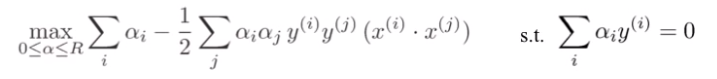

El primer término hace referencia al margen y el segundo a la penalización aplicada a las muestras mal clasificadas. Lo que nos interesa es comprobar que el resultado depende del producto escalar de todas nuestras muestras:

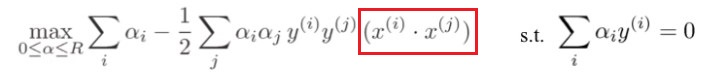

Podemos decir que este producto escalar mide la similitud de x<sup>(i)</sup> y de x<sup>(j)</sup>: en general, si los vectores que representan ambas muestras apuntan en la misma dirección, el producto escalar será máximo e igual al producto de sus módulos (de sus longitudes). Si son ortogonales, el producto escalar será 0. Si si apuntan en direcciones opuestas, será negativo. Por ejemplo, en esta imagen se muestran los vectores correspondientes a dos puntos de nuestro dataset, cuyo producto escalar habría que calcular:

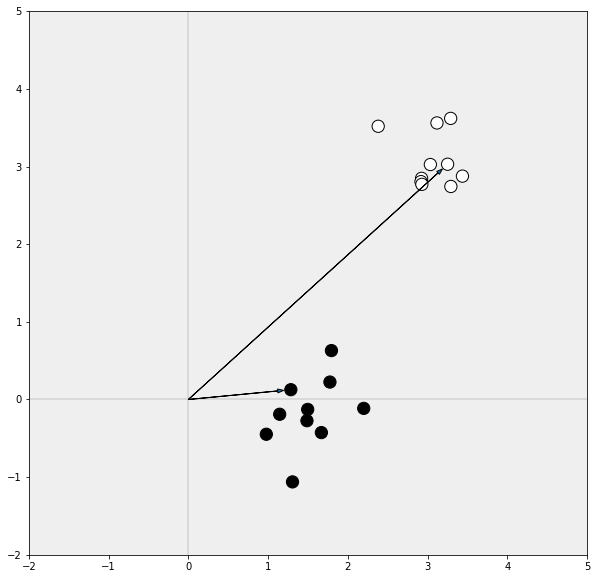

# Producto escalar de dos vectores
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Recordemos que el producto escalar de los vectores se obtiene proyectando uno sobre otro y multiplicando los módulos (longitudes) del vector formado por la proyección y del vector sobre el que estamos proyectando:

In [61]:
x1, y1 = 3, 2
x2, y2 = 1, 2

s1 = np.array([x1, y1])
s2 = np.array([x2, y2])

Partimos de los siguientes puntos, representados por sus vectores:

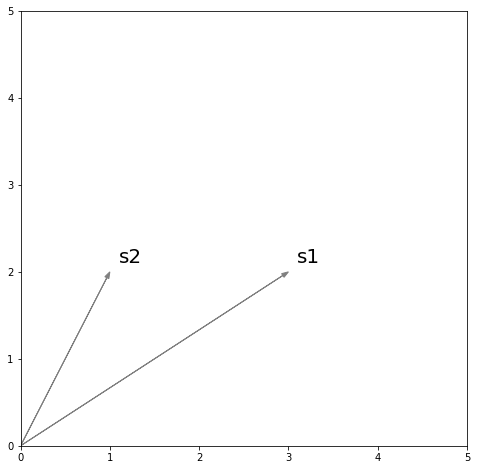

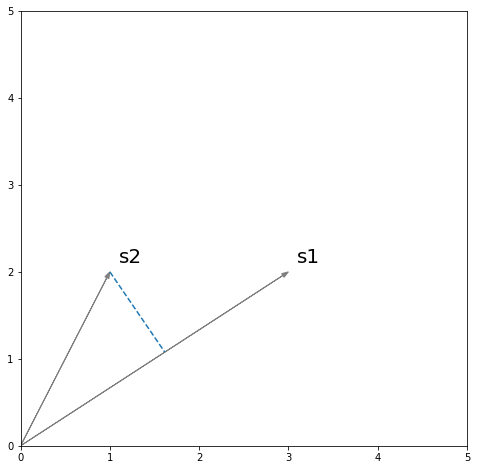

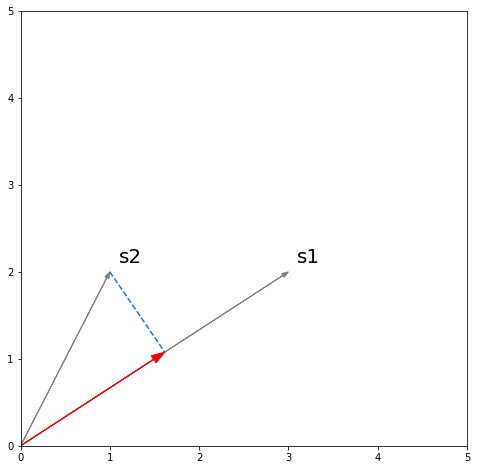

Módulo del vector 1:     3.61

Módulo del vector 2:     2.24

Módulo de la proyección: 1.94

Producto escalar:        7.00

Una forma equivalente de calcular el producto escalar de dos vectores es multiplicar sus módulos y este resultado a su vez por el coseno del ángulo que forman ambos vectores.

Volviendo a la fórmula objetivo:

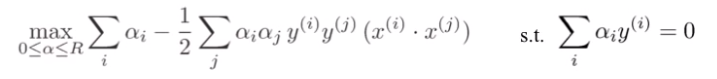

Obsérvese que el resultado de calcular el producto escalar entre todos los puntos es una matriz cuadrada que tiene un ancho y un alto igual al número de muestras con las que estamos trabajando. Esta matriz formada por el producto escalar de un conjunto de vectores es la denominada en matemáticas **Matriz de Gram**.

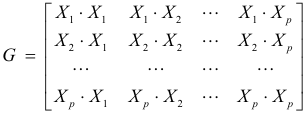

O dicho con otras palabras, la obtención del clasificador depende de la relación entre todos los puntos entre sí, y esta relación viene dada por una matriz que, en los ejemplos puestos hasta ahora, contienen simplemente el producto escalar de los vectores que definen cada muestra.

Por ejemplo, si trabajamos en un dataset con tres muestras y dos características predictivas:

In [62]:
X = np.array([
    [2, -1],
    [0, 3],
    [4, 2]
])
y = [0, 1, 0]

In [63]:
X

array([[ 2, -1],
       [ 0,  3],
       [ 4,  2]])

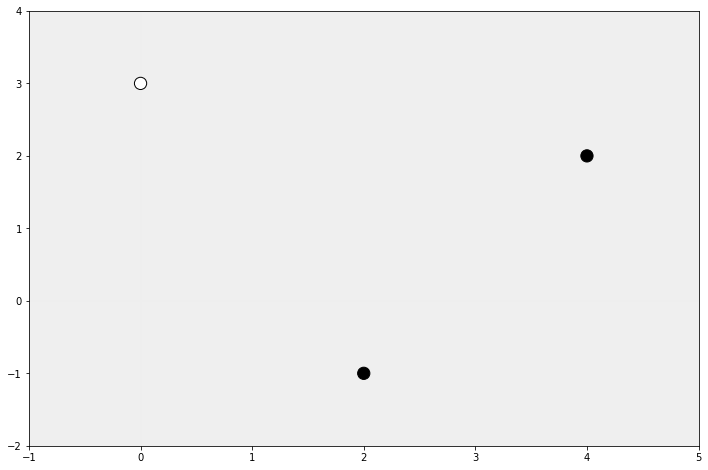

In [64]:
draw(X, y);

La matriz de Gram vendrá dada por la siguiente expresión:

In [65]:
np.dot(X, X.T)

array([[ 5, -3,  6],
       [-3,  9,  6],
       [ 6,  6, 20]])

O si estamos trabajando en un espacio unidimensional (una única característica predictiva) y tres muestras:

In [66]:
X = np.array([[1], [3], [7]]).reshape(-1, 1)
y = [0, 1, 0]

In [67]:
X

array([[1],
       [3],
       [7]])

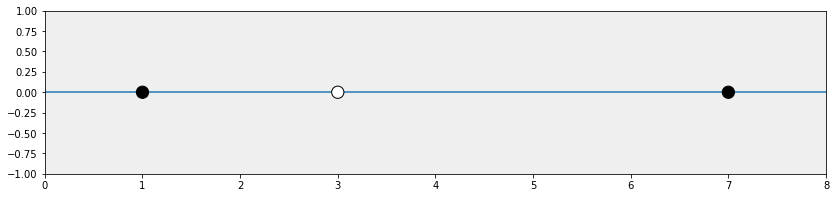

In [68]:
fig, ax = draw(np.c_[X, [0]*len(X)], y, shape = (14, 3), show = False);
ax.axhline(0, zorder = -1)
plt.show()

...la matriz de gram vendrá dada por:

In [69]:
np.dot(X, X.T)

array([[ 1,  3,  7],
       [ 3,  9, 21],
       [ 7, 21, 49]])

...que coincide con el producto cruzado de cada pareja de valores.

# Kernels
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Hemos comentado la opción de aplicar una transformación, a la que podemos llamar &Phi;, a nuestros datos, de forma que al transformarlos de un espacio de baja dimensionalidad:

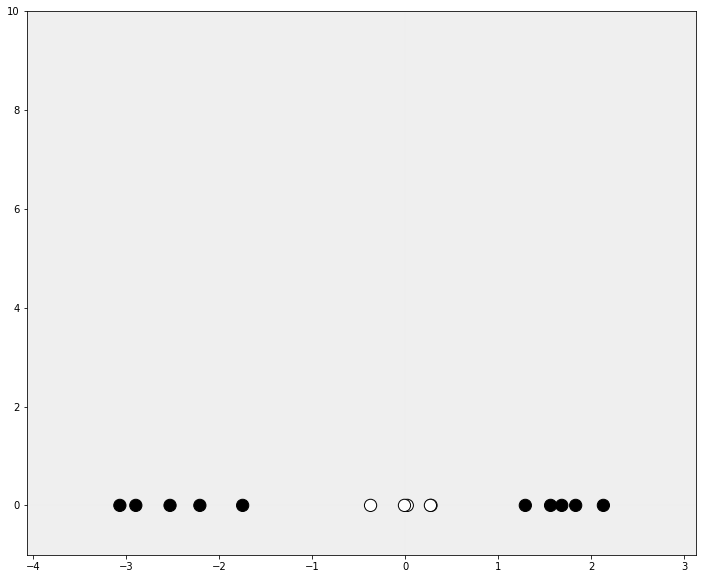

...a otro de mayor dimensionalidad:

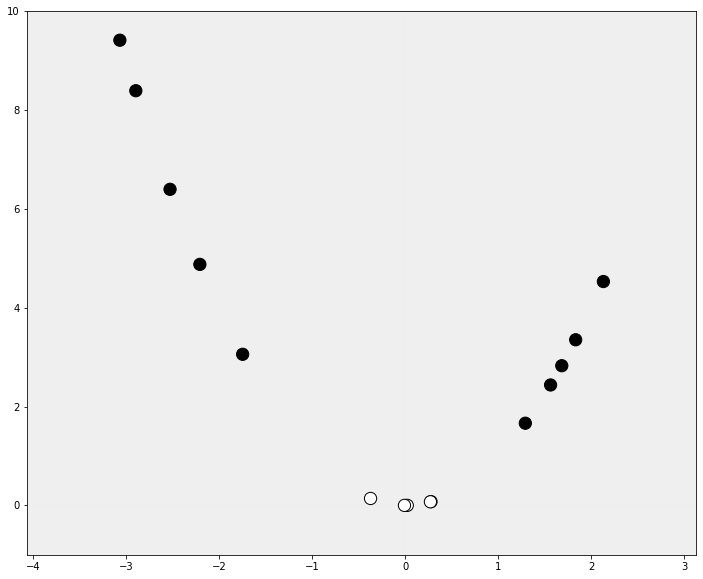

...sea posible encontrar un clasificador lineal:

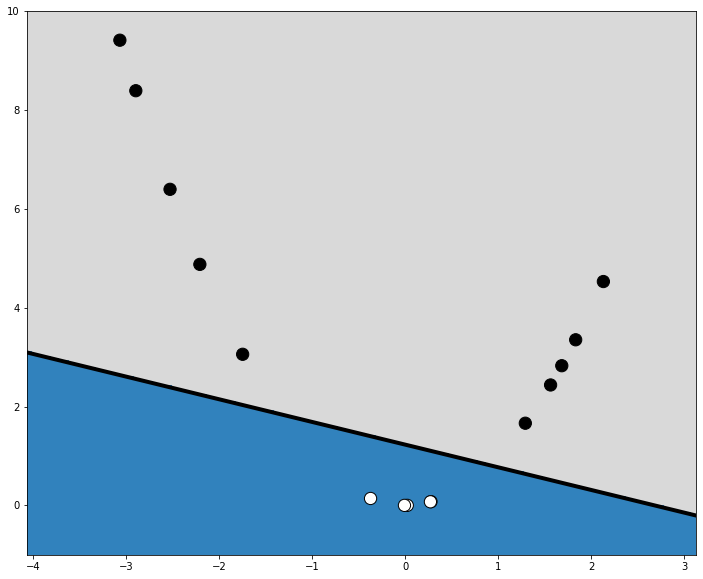

Esto nos obligaría a transformar cada uno de nuestros datos x al nuevo espacio aplicando la función de transformación &phi;(x)

Pues bien, si transformamos los datos y aplicamos el mismo proceso matemático para encontrar el hiperplano de máximo margen en el nuevo espacio, volveremos a llegar a una función objetivo semejante a la vista:

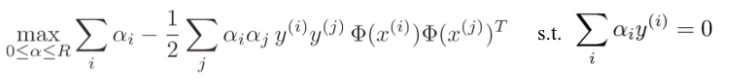

Que también depende del producto escalar de los vectores transformados:

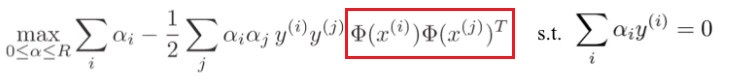

Es decir, en la práctica, sea cual sea la transformación a realizar, la función objetivo a resolver depende del producto escalar de todos los vectores transformados, productos escalares que se incluyen en la función en forma de una matriz, lo que puede resultar costoso desde un punto de vista computacional, y más si el espacio de los vectores transformados es de muy alta dimensionalidad.

En teoría, esto supone que si tenemos 10.000 muestras, estamos trabajando en un espacio de 20 dimensiones y queremos transformar nuestros datos a un espacio de, por ejemplo, 100 dimensiones, tendríamos que transformar los 10.000 datos y calcular el producto escalar de 10.000 x 10.000 vectores (100 millones) de 100 dimensiones cada uno. Esto es mucho trabajo. Y estamos considerando un espacio de alta dimensionalidad de "solo" 100 dimensiones pues, por ejemplo, hay transformaciones que convierten nuestros datos a un espacio ¡con un número infinito de dimensiones!

Aquí es donde entra en juego el llamado "kernel trick" (truco del kernel). Para verlo en funcionamiento supongamos que nuestra función &Phi; es la mostrada en la siguiente imagen:

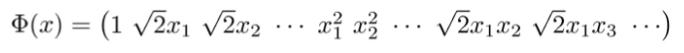

...es decir, una tranformación polinomial cuadrática. Esta tranformación transforma un vector de n dimensiones en otro de n<sup>2</sup>.

Tal y como se ha explicado, tendríamos que tranformar todos nuestros datos y calcular el producto escalar. Supongamos las muestras a y b. Una vez transformadas serían:

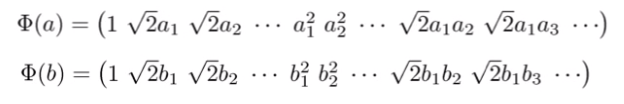

El producto escalar sería el siguiente:

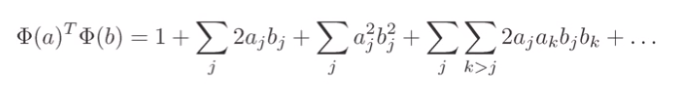

Pero, si manipulamos la ecuación anterior, llegamos a una función extremadamente más simple:

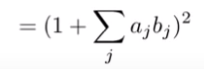

Simplemente calcular el producto escalar de a y b (en el espacio original, sin transformar), sumar 1 y elevar todo al cuadrado. Y esta relación se mantiene también para funciones polinómicas de mayor grado.

La expresión anterior es lo que se denomina **kernel** y se representa frecuentemente como **K(a, b)**.

Es decir, con independencia del número de características que la función &Phi; esté creando en el espacio destino, podemos calcular la relación entre las muestras a y b en dicho espacio mediante un sencillo cálculo en el espacio origen. 

# El Kernel Trick
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

De hecho, el concepto comentado puede generalizarse. Así, cualquier función K(a, b) que cumpla cierta condición matemática (la llamada *condición de Mercer*) puede ser interpretada como el resultado de evaluar el producto escalar de los vectores a y b para algúna función &Phi;, recibiendo esta función K el nombre de kernel.

Dado un kernel K, puede ser difícil o imposible de calcular (imaginemos una función &Phi; que transforme nuestros datos a un espacio de dimensionalidad infinita), pero el kernel nos permite obtener el equivalente al producto escalar de &Phi;(a).&Phi;(b) sin necesidad de conocer la función &Phi; ni de transformar los datos realmente.

Es decir, si la función K:
1. Transforma los datos a un espacio de mayor multidimensionalidad
1. Su resultado es sencillo de obtener para dos vectores a y b
1. Permite obtener un clasificador de máximo margen en el espacio destino

...entonces el conocer la función &Phi; a la que representa es, sencillamente, innecesario.

La funión &Phi; puede estar transformando nuestros datos a un espacio de 10, 1000 o un billón de dimensiones, y puede estar haciéndolo aplicando unos cálculos u otros. Pero todo eso resulta absolutamente irrelevante, pues podemos aplicar el kernel directamente y obviar el paso por el espacio destino.

Esto es lo que se conoce como el **kernel trick**: estamos transformando nuestros datos sin estar realmente tranformándolos.

# Kernels comunes
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Sobre el papel, cualquier transformación podría ser usada, aunque en la práctica las librerías que implementan este algoritmo suelen incluir un número de kernels limitado: polynomial, gaussian, Gaussian Radial Basis Function (RBF), Laplace RBF, hyperbolic tangent, sigmoid, bessel, ANOVA radial basis...

Scikit-Learn implementa cuatro kernels:
* linear
* poly
* rbf
* sigmoid

...aunque también admite la opción de personalizar el kernel como una función Python o indicando la matriz que define la transformación.

Aquí tenemos las funciones a aplicar para un conjunto frecuente de kernels:

### Linear kernel

Kernel más simple de todos: calcula el producto escalar de los dos vectores y suma una constante opcional:

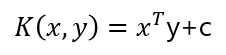

(Scikit-Learn no contempla el uso de una constante)

### Polynomial kernel

El kernel polinómico viene definido en general por la siguiente función:

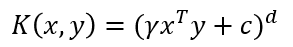

En este kernel tenemos tres parámetros ajustables: &alpha;, la constante c y el grado del polinómio d.

### Radial Basis Function (Gaussian)

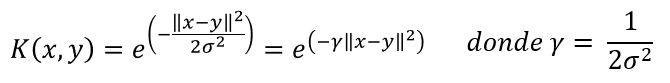

En este kernel tenemos un único parámetro ajustable: &gamma; (o &sigma;), que deberá ser escogido muy cuidadosamente pues si es demasiado pequeño, la exponencial tenderá a comportarse linealmente. Y si es demasiado grande, la función será demasiado sensible a los datos de entrenamiento (tendiendo al sobreentrenamiento).

Este kernel es, probablemente, el más común (el es kernel usado por Scikit-Learn salvo que se especifique otro).

### Sigmoid kernel

Este kernel es también denominado **Multilayer Perceptron kernel**. Un modelo SVM usando este kernel es equivalente a una red neuronal con dos capas.

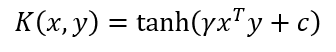

En este kernel tenemos dos posible parámetros ajustables: &alpha; y la constante c.

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Aplica los kernels vistos a un clasificador aplicado a las características "sepal_length" y "sepal_width" conjunto Iris al completo (considerando las tres clases).</div>
</div>

Comenzamos cargando el dataset:

In [70]:
iris = pd.read_csv("iris.csv")
iris.head()
#iris = iris.loc[iris.species_name.isin(["setosa", "virginica"])]
iris = iris.reindex(["sepal_length", "sepal_width", "species"], axis = 1)
iris = iris.sample(frac = 1)
y = iris.pop("species").astype("category").cat.codes.values
X = iris.values

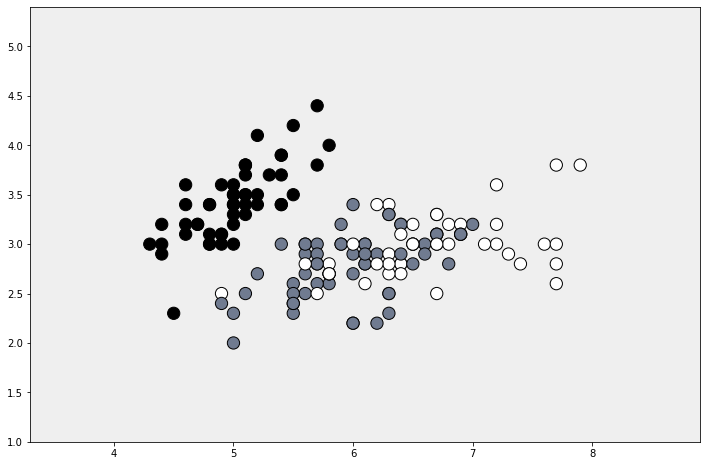

In [71]:
draw(X, y);

### Linear kernel

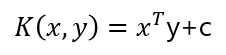

Este kernel ya lo conocemos: no transforma los datos a un espacio de mayor dimensionalidad:

In [72]:
from draw import draw3

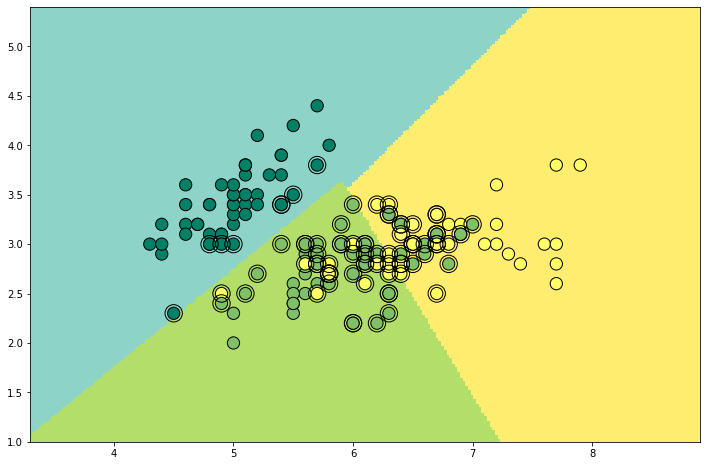

In [73]:
model = SVC(kernel = "linear")
model.fit(X, y)
draw3(X, y, model);

### Polynomial kernel

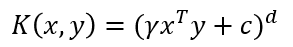

Podemos simular el kernel lineal con el polinómico, especificando grado 1 (ahora sí podríamos especificar la constante c):

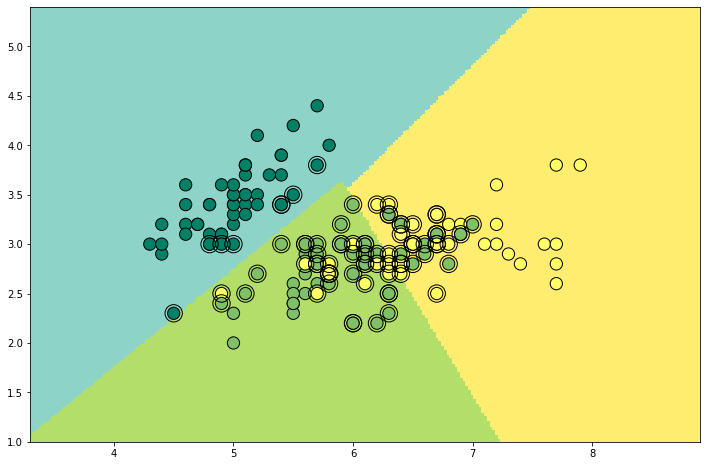

In [74]:
model = SVC(kernel = "poly", degree = 1, gamma = 1, coef0 = 0)
model.fit(X, y)
draw3(X, y, model);

Si especificamos grado 2, estaremos convirtiendo nuestro dataset a un espacio de 4 dimensiones:

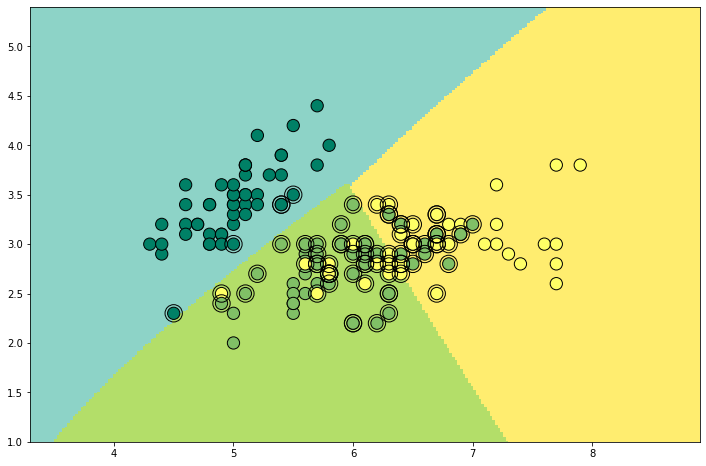

In [75]:
model = SVC(kernel = "poly", degree = 2)
model.fit(X, y)
draw3(X, y, model);

Con grado 3, a un espacio de 6 dimensiones:

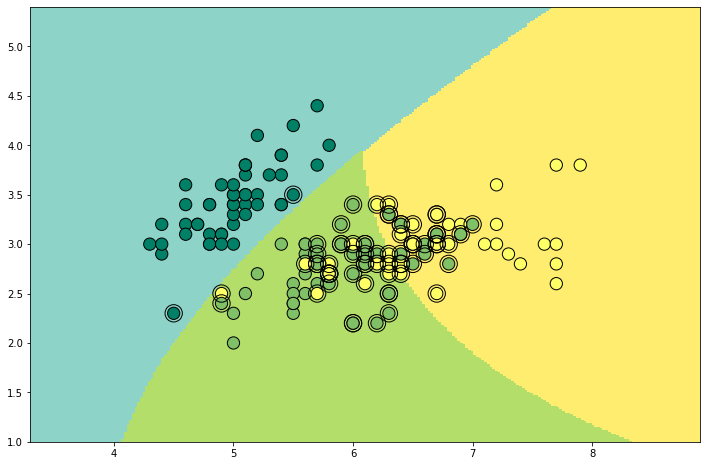

In [76]:
model = SVC(kernel = "poly", degree = 3)
model.fit(X, y)
draw3(X, y, model);

Obsérvese la influencia del coeficiente de regularización:

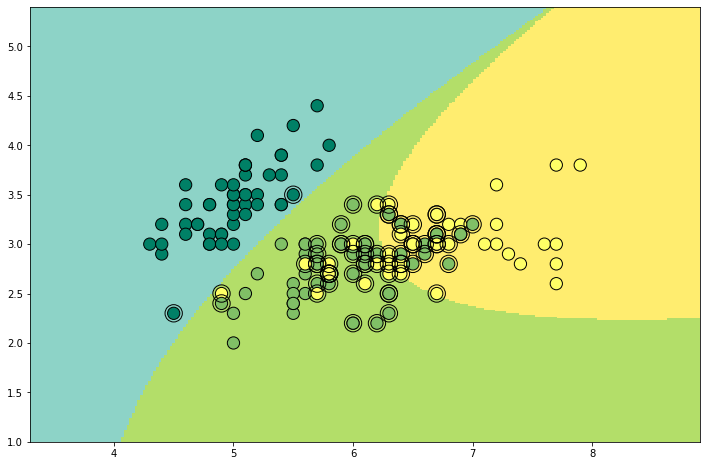

In [77]:
model = SVC(kernel = "poly", degree = 3, C = 10)
model.fit(X, y)
draw3(X, y, model);

### Radial Basis Function (Gaussian)

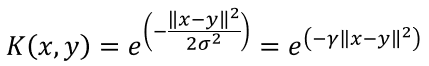

Si se asigna a &gamma; el valor "auto", tomará el valor 1/n, siendo n el número de características.

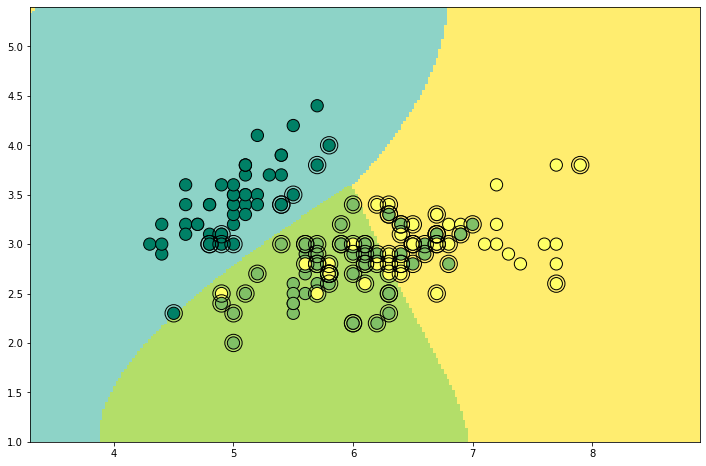

In [78]:
model = SVC(kernel = "rbf", gamma = "auto")
model.fit(X, y)
draw3(X, y, model);

Como comentamos, si &gamma; es muy pequeño, la función tenderá a comportarse linealmente:

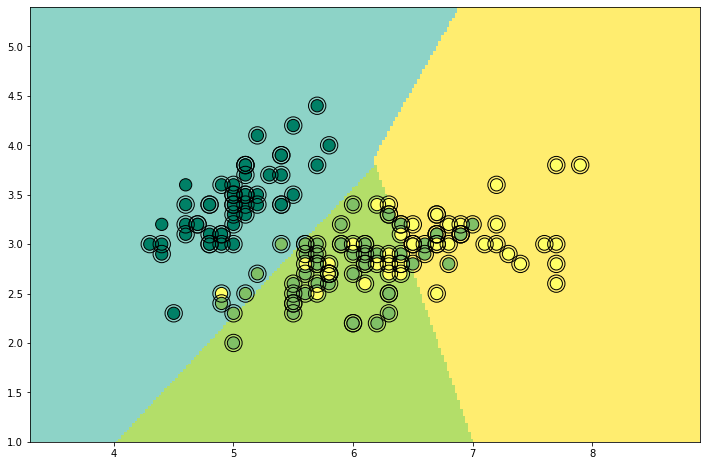

In [79]:
model = SVC(kernel = "rbf", gamma = 0.01)
model.fit(X, y)
draw3(X, y, model);

Y si es muy grande, tenderá al sobreentrenamiento:

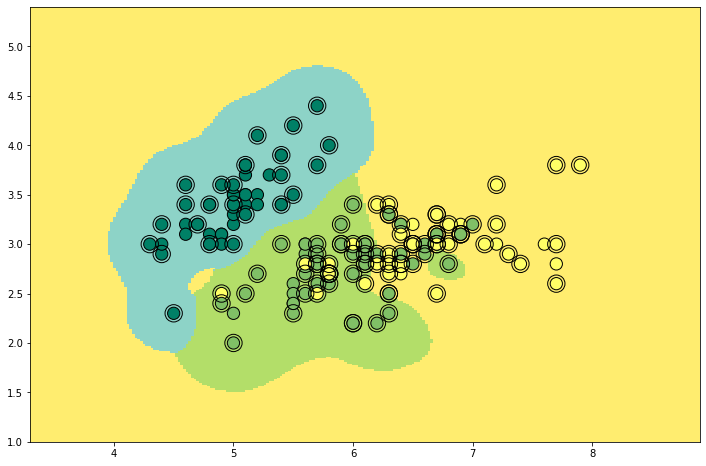

In [80]:
model = SVC(kernel = "rbf", gamma = 10)
model.fit(X, y)
draw3(X, y, model);

### Sigmoid kernel

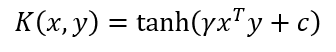

Veamos el comportamiento de este kernel para varios valores de gamma:

0.001


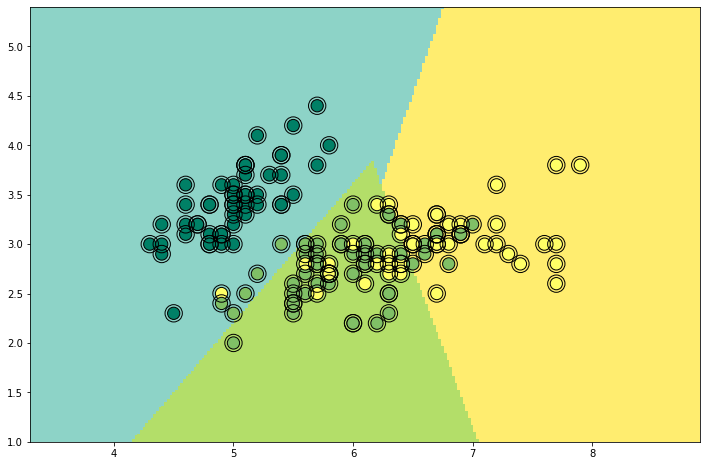

0.01


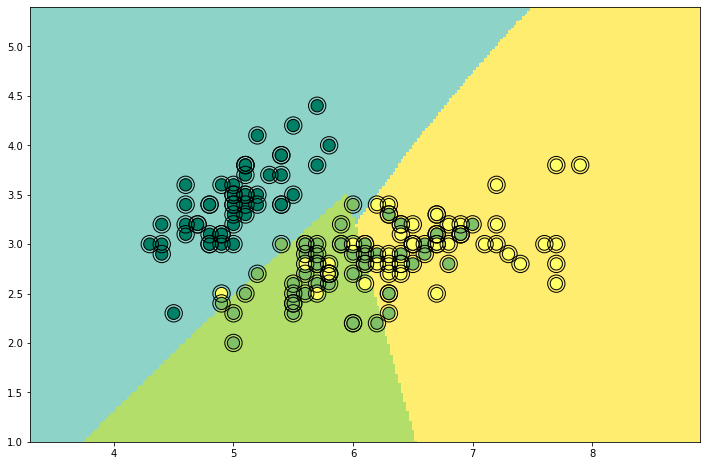

0.1


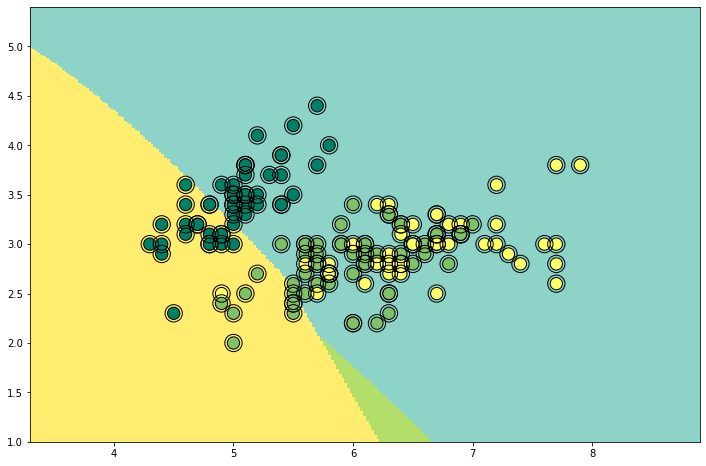

1


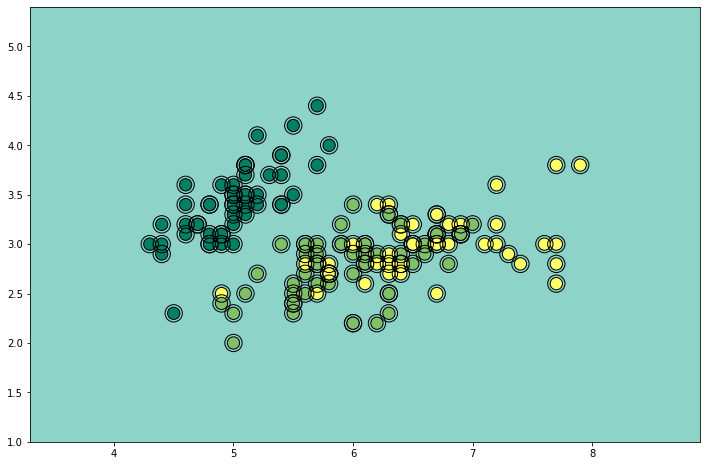

In [81]:
gammas = [0.001, 0.01, 0.1, 1]
for g in gammas:
    print(g)
    model = SVC(kernel = "sigmoid", gamma = g, coef0 = 0)
    model.fit(X, y)
    draw3(X, y, model);

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Aplica los kernels vistos a un clasificador aplicado al dataset mnist.</div>
</div>

Comenzamos cargando los datos:

In [82]:
X = pd.read_csv("./mnist/mnist.csv", header = None)
X.drop(0, inplace = True)
y = X.pop(0)

Vamos a separar un pequeño grupo de muestra para validación:

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Mostremos alguna número aleatorio extraído del dataset de entrenamiento:

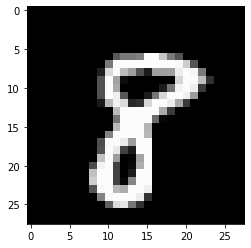

In [85]:
i = np.random.randint(0, len(X_train))
plt.imshow(X_train.iloc[i].values.reshape(28, 28), cmap = "gray");

Como referencia, vamos a entrenar un modelo Random Forest (sin ajuste fino alguno):

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
%%time
rf = RandomForestClassifier()
cross_val_score(rf, X, y, cv = 5).mean()

Wall time: 17.4 s


0.9446999999999999

Instanciamos el algoritmo SVC y lo entrenamos:

In [89]:
%%time
model = SVC(kernel = "rbf")
model.fit(X_train, y_train)

Wall time: 14 s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Evaluémoslo:

In [90]:
model.score(X_test, y_test)

0.9584

###### Evaluación con validación cruzada

In [91]:
%%time
cross_val_score(model, X, y, cv = 5).mean()

Wall time: 1min 42s


0.9593

# Kernels personalizados
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Scikit-Learn también soporta kernels personalizados. Carguemos algunos datos para probarla esta opción...

In [92]:
import seaborn as sns

In [93]:
iris = sns.load_dataset("iris")
iris = iris[iris.species.isin(["setosa", "virginica"])]
iris = iris.loc[:, ["sepal_length", "sepal_width", "species"]]
iris = iris.sample(frac = 1)
y_iris = iris.pop("species").astype("category").cat.codes.values
X_iris = iris.values

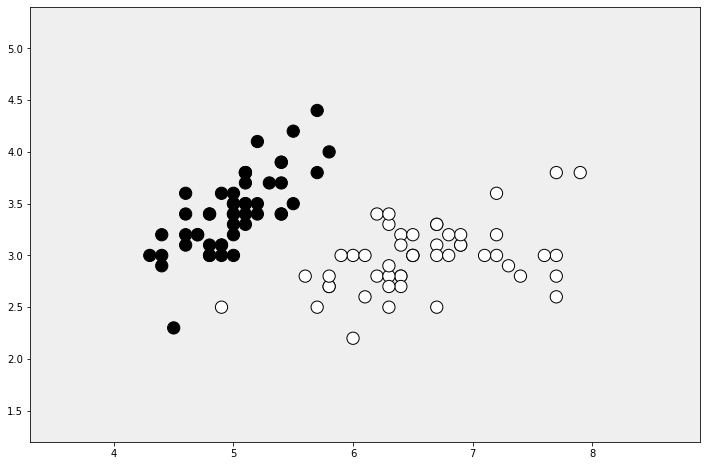

In [94]:
draw(X_iris, y_iris);

El kernel deberá ser proveído en forma de función que aceptará como parámetros dos vectores o dos dataframes y devolverá el resultado de la operación definida entre ellos:

In [95]:
def custom_kernel(X, Y):
    #return np.dot(X, Y.T)
    M = np.array([[2, 0], [0, 1]])
    return np.dot(np.dot(X, M), Y.T)

In [96]:
model = SVC(kernel = custom_kernel)
model.fit(X_iris, y_iris)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel=<function custom_kernel at 0x000002B2801E60D8>, max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [97]:
model.support_vectors_

array([], shape=(0, 0), dtype=float64)

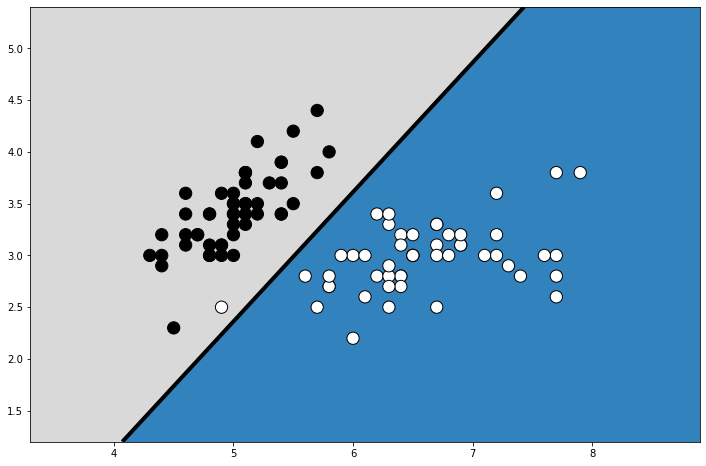

In [98]:
draw(X_iris, y_iris, model, sv = False, l = False);

# Implementaciones de Scikit-Learn
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Scikit-Learn ofrece tres clases para dar soporte a SVM en clasificación: SVC, NuSVC y LinearSVD. Estas tres clases se basan en dos librerías: libsvm y liblinear:

https://www.csie.ntu.edu.tw/~cjlin/libsvm/

https://www.csie.ntu.edu.tw/~cjlin/liblinear/

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVC</a>: Basada en la librería libsvm.

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html">NuSVC</a>: También basada en libsvm. Semejante a SVC pero acepta un conjunto de parámetros ligeramente diferente e implementa funciones matemáticas diferentes.

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html">LinearSVC</a>: se basa en la librería liblinear, solo implementa el kernel lineal y es mucho más eficiente que el equivalente de SCV.

# Escenarios de regresión
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

En 1996 se propuso una versión de SVM para escenarios de regresión. Con este objetivo Scikit-Learn implementa tres clases equivalentes a las vistas: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html">SVR</a>, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html">NuSVR</a> y <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html">LinearSVR</a>.

Veamos un sencillo ejemplo. Cargamos los datos:

In [99]:
from sklearn.datasets import load_boston

In [100]:
boston = load_boston()

In [101]:
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.Series(boston.target)

In [102]:
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [105]:
X[:4]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ],
       [-0.41675042, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.01630251, -0.80988851,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.41616284, -1.36151682]])

Dividimos el dataset en dos bloques para entrenamiento y validación:

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Importamos la clase, instanciamos el algoritmos y lo entrenamos:

In [107]:
from sklearn.svm import SVR

In [108]:
model = SVR(C = 1000, epsilon = 1)
model.fit(X_train, y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

El coeficiente de determinación asociado es:

In [109]:
model.score(X_test, y_test)

0.8257935786325271

# Ventajas y desventajas
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Las ventajas de SVM son:

* Efectivos en espacios de alta dimensionalidad, aun cuando el número de dimensiones supera el número de muestras
* Eficiente gestión de la memoria, al usar solo un subconjunto de puntos en la función de decisión

Las desventajas incluyen:

* Su eficacia dependel del kernel que se escoja
* Resultan poco eficientes con datasets grandes (el cálculo del kernel puede resultar muy lento)
* Si el número de características es mucho mayor que el número de muestras, resulta crucial evitar el sobreentrenamiento escogiendo el kernel y el término de regularización adecuados
* SVM no proporciona estimaciones de probabilidad
* La frontera depende directamente de los valores más próximos, aunque sean erroneos
* SVM es muy dependiente de la escala de nuestros datos, por lo que convendrá escalarlos adecuadamente

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>